# GAMA-09 master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
56042ea (Thu Aug 3 18:51:31 2017 +0100) [with local modifications]


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3, venn2

from herschelhelp_internal.masterlist import nb_compare_mags, nb_ccplots, nb_histograms, quick_checks

In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = os.environ.get('SUFFIX', time.strftime("_%Y%m%d"))
SUFFIX = "_20170815"

master_catalogue = Table.read("{}/master_catalogue_gama-09{}.fits".format(OUT_DIR, SUFFIX))

## 0 - Quick checks

In [ ]:
quick_checks(master_catalogue).show_in_notebook()

## I - Summary of wavelength domains

In [4]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

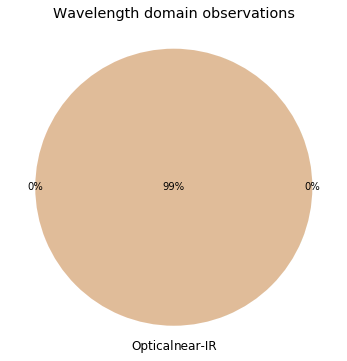

In [5]:
venn2(
    [
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 3)
    ],
    set_labels=('Optical', 'near-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

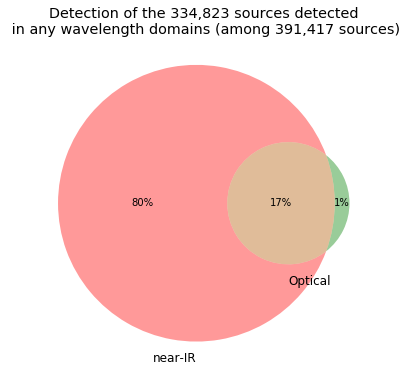

In [6]:
venn2(
    [
        np.sum(flag_det[flag_obs == 3] == 1),
        np.sum(flag_det[flag_obs == 3] == 2),
        np.sum(flag_det[flag_obs == 3] == 3)
    ],
    set_labels=('near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [7]:
u_bands = ["Megacam u",            "KIDS u"]
g_bands = ["Megacam g", "DECam g", "KIDS g", "SUPRIME g", "GPC1 g"]
r_bands = ["Megacam r", "DECam r", "KIDS r", "SUPRIME r", "GPC1 r"]
i_bands = ["Megacam i", "DECam i", "KIDS i", "SUPRIME i", "GPC1 i"]
z_bands = ["Megacam z", "DECam z",           "SUPRIME z", "GPC1 z"]
y_bands = [             "DECam y",           "SUPRIME y", "GPC1 y"]

In [12]:
for band in g_bands:
    print(band, 'max:', np.nanmax(master_catalogue["m_{}".format(band.replace(" ", "_").lower())]))

Megacam g max: 29.9689998627
DECam g max: nan
KIDS g max: 36.3949
SUPRIME g max: 37049.8
GPC1 g max: 27.3309001923


/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:355: RuntimeWarning: All-NaN axis encountered
  warnings.warn("All-NaN axis encountered", RuntimeWarning)


The Suprime g magnitudes are very wrong. They are almost all between 0 and 1.

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

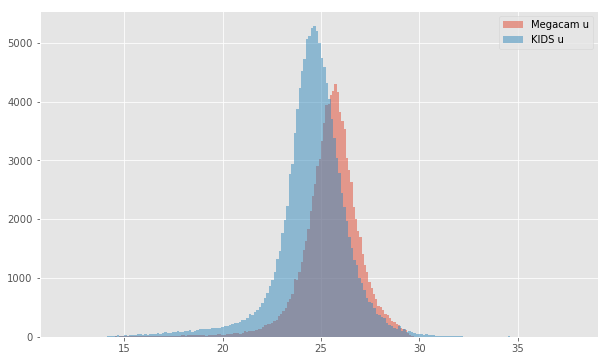

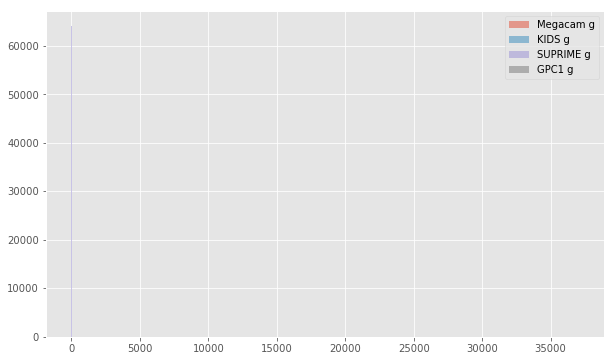

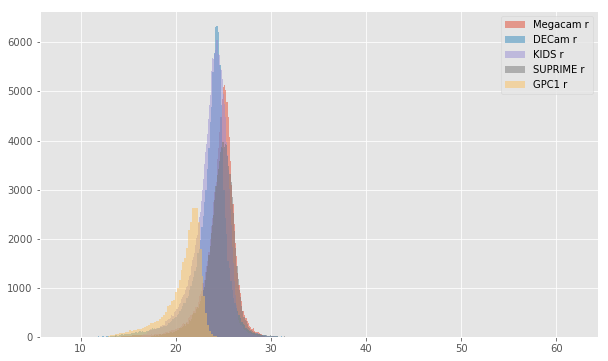

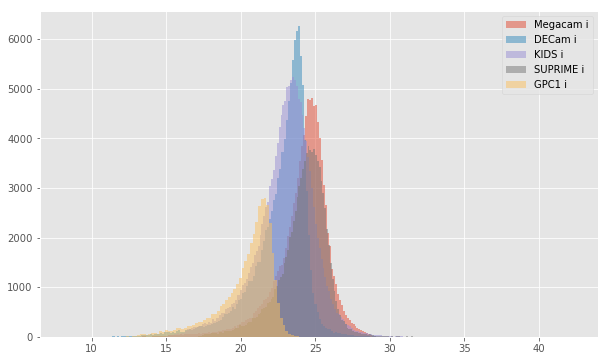

HELP warning: One or more of the columns is empty.


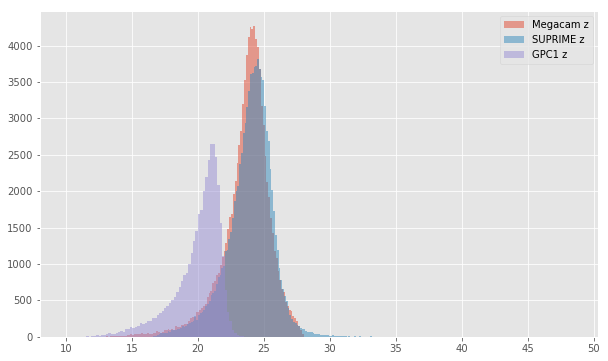

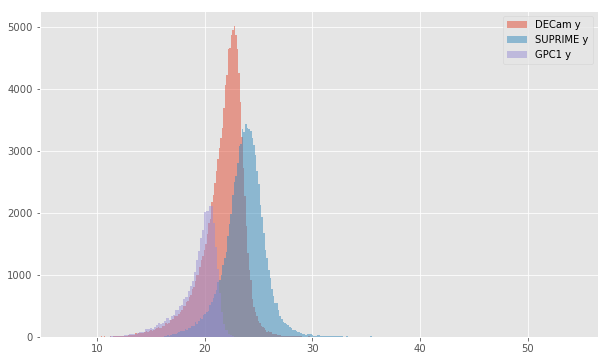

In [18]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

KIDS u (aperture) - Megacam u (aperture):
- Median: 0.09
- Median Absolute Deviation: 0.41
- 1% percentile: -2.5057778358459473
- 99% percentile: 2.591320037841797


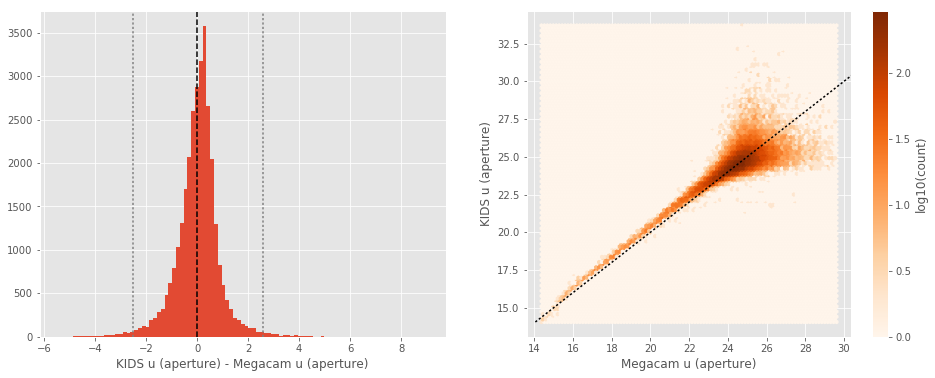

KIDS u (total) - Megacam u (total):
- Median: 0.20
- Median Absolute Deviation: 0.45
- 1% percentile: -2.489583778381348
- 99% percentile: 3.4670406341552744


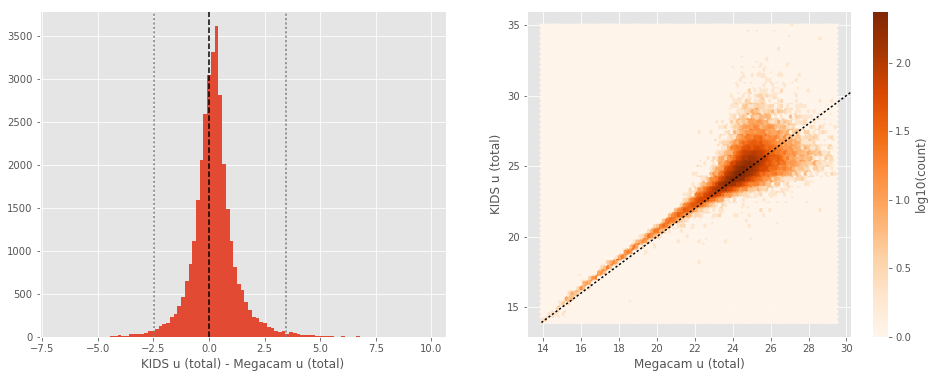

There are no overlapping magnitudes...
There are no overlapping magnitudes...
KIDS g (aperture) - Megacam g (aperture):
- Median: 0.20
- Median Absolute Deviation: 0.18
- 1% percentile: -0.8259112167358398
- 99% percentile: 1.622036437988283


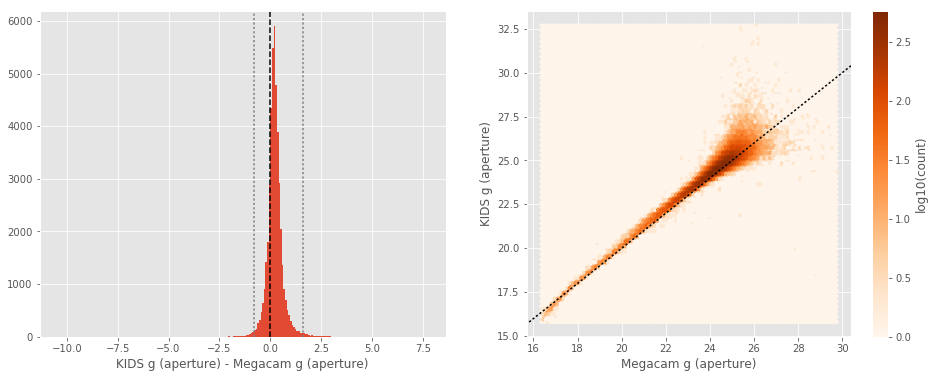

KIDS g (total) - Megacam g (total):
- Median: 0.30
- Median Absolute Deviation: 0.22
- 1% percentile: -0.847346305847168
- 99% percentile: 2.5023841857910156


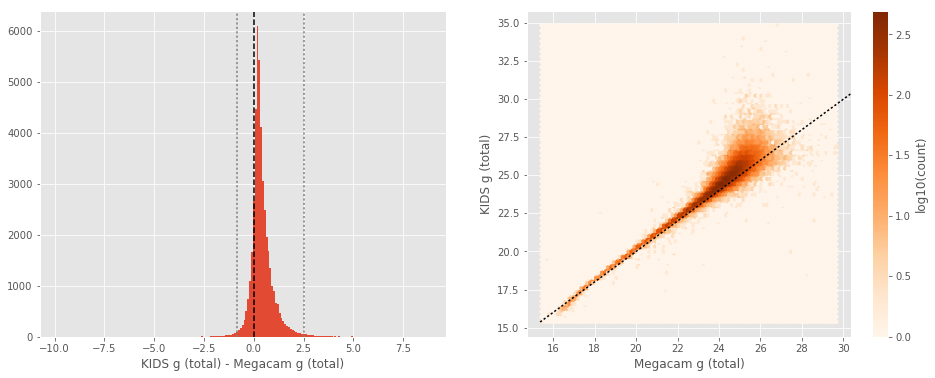

There are no overlapping magnitudes...
There are no overlapping magnitudes...
GPC1 g (aperture) - Megacam g (aperture):
- Median: -0.11
- Median Absolute Deviation: 0.26
- 1% percentile: -2.0391357421875
- 99% percentile: 2.7322039794921875


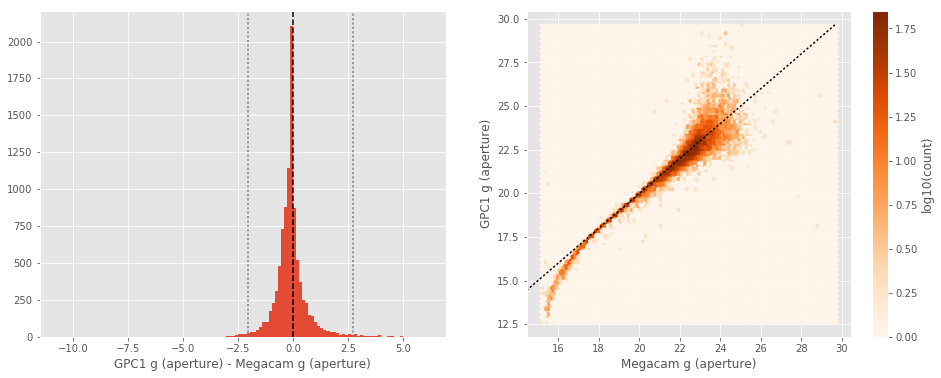

GPC1 g (total) - Megacam g (total):
- Median: 0.05
- Median Absolute Deviation: 0.14
- 1% percentile: -1.3198198699951171
- 99% percentile: 0.8618811416625951


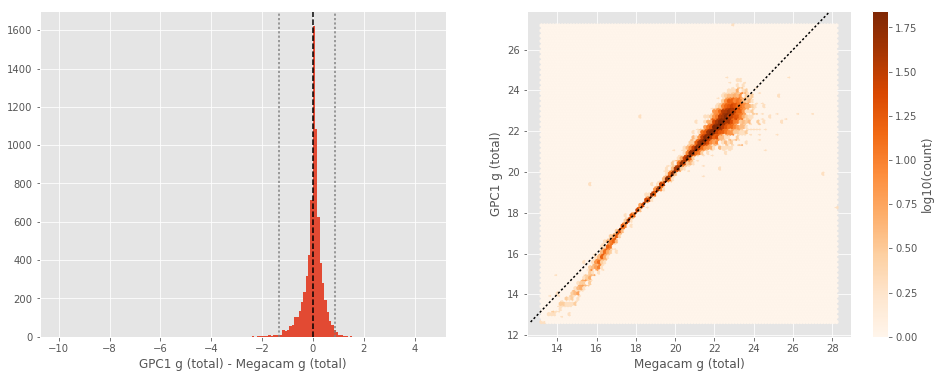

There are no overlapping magnitudes...
There are no overlapping magnitudes...
There are no overlapping magnitudes...
There are no overlapping magnitudes...
There are no overlapping magnitudes...
There are no overlapping magnitudes...
SUPRIME g (aperture) - KIDS g (aperture):
- Median: -0.10
- Median Absolute Deviation: 0.12
- 1% percentile: -1.436314811706543
- 99% percentile: 0.8454122352600092


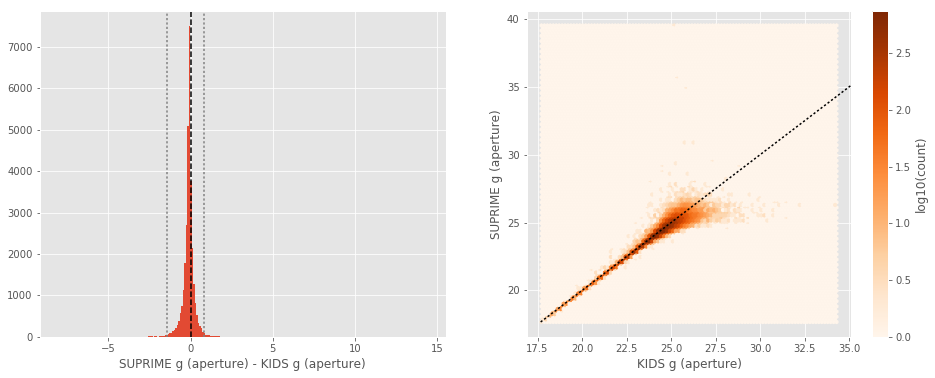

SUPRIME g (total) - KIDS g (total):
- Median: -23.93
- Median Absolute Deviation: 1.01
- 1% percentile: -27.401845550537107
- 99% percentile: -18.220891971588117


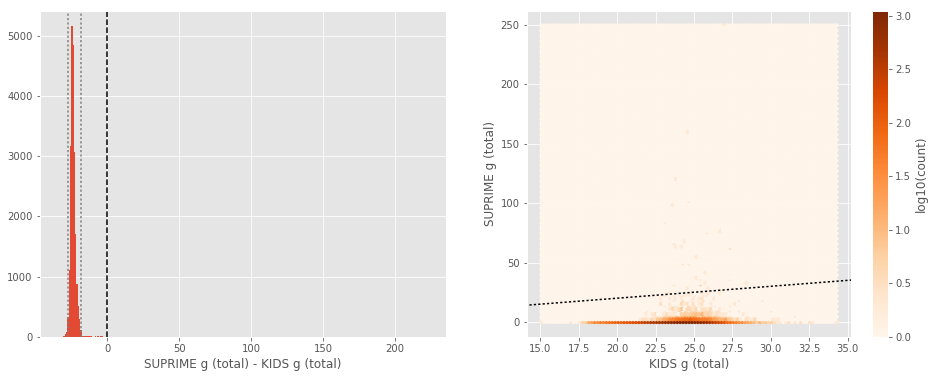

GPC1 g (aperture) - KIDS g (aperture):
- Median: -0.23
- Median Absolute Deviation: 0.29
- 1% percentile: -1.9922897338867185
- 99% percentile: 2.3554222106933587


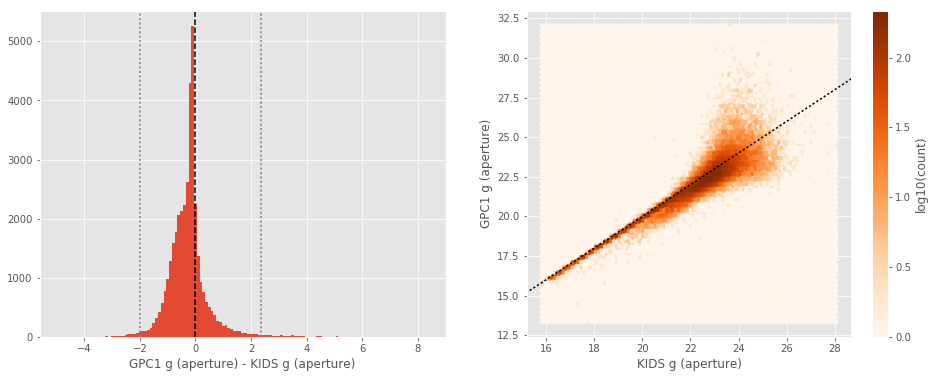

GPC1 g (total) - KIDS g (total):
- Median: -0.06
- Median Absolute Deviation: 0.14
- 1% percentile: -1.3799827575683592
- 99% percentile: 0.8376995086669945


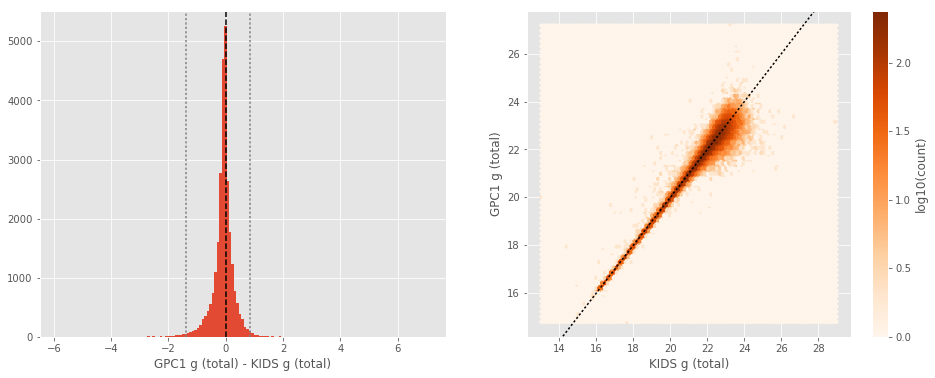

GPC1 g (aperture) - SUPRIME g (aperture):
- Median: -0.14
- Median Absolute Deviation: 0.31
- 1% percentile: -1.9369909858703613
- 99% percentile: 2.661011009216308


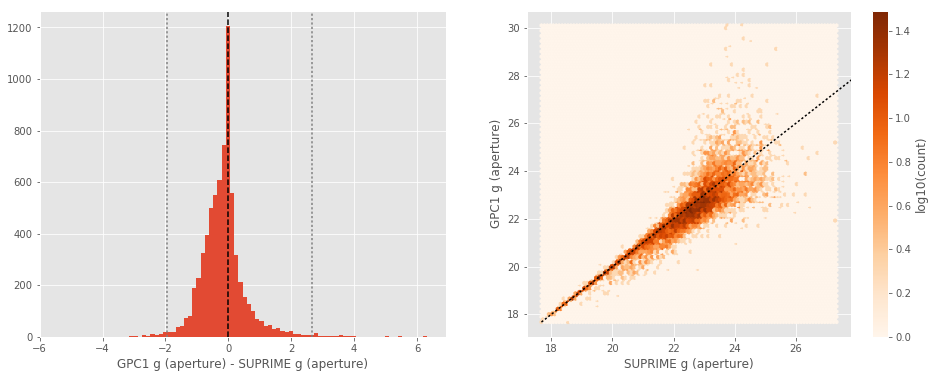

GPC1 g (total) - SUPRIME g (total):
- Median: 21.86
- Median Absolute Deviation: 0.75
- 1% percentile: 18.365502535412087
- 99% percentile: 23.7347720798105


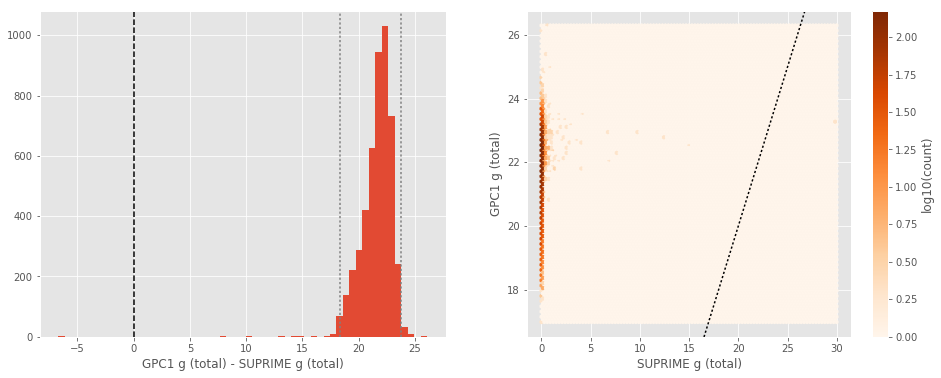

DECam r (aperture) - Megacam r (aperture):
- Median: 0.79
- Median Absolute Deviation: 0.42
- 1% percentile: -0.5798144435882568
- 99% percentile: 3.5593833732604967


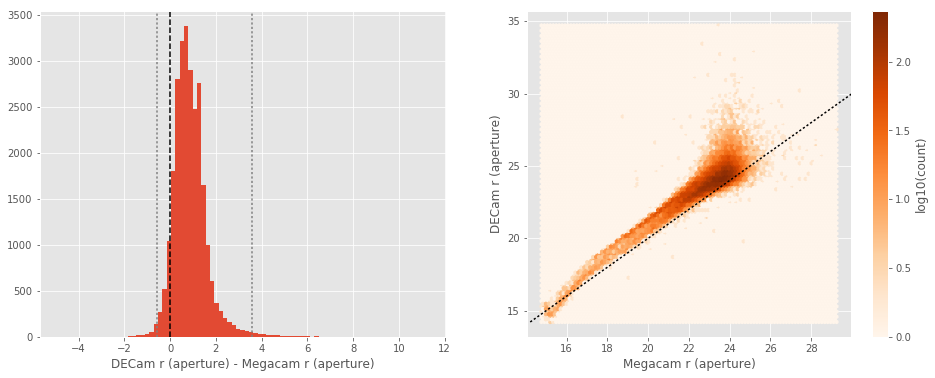

DECam r (total) - Megacam r (total):
- Median: 0.91
- Median Absolute Deviation: 0.40
- 1% percentile: -0.5291912937164307
- 99% percentile: 3.6187529563903453


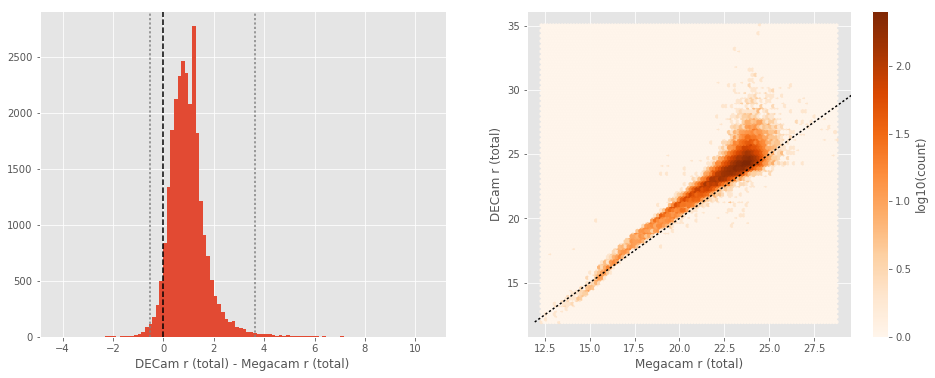

KIDS r (aperture) - Megacam r (aperture):
- Median: 0.04
- Median Absolute Deviation: 0.13
- 1% percentile: -0.9308253860473633
- 99% percentile: 0.7798844909668


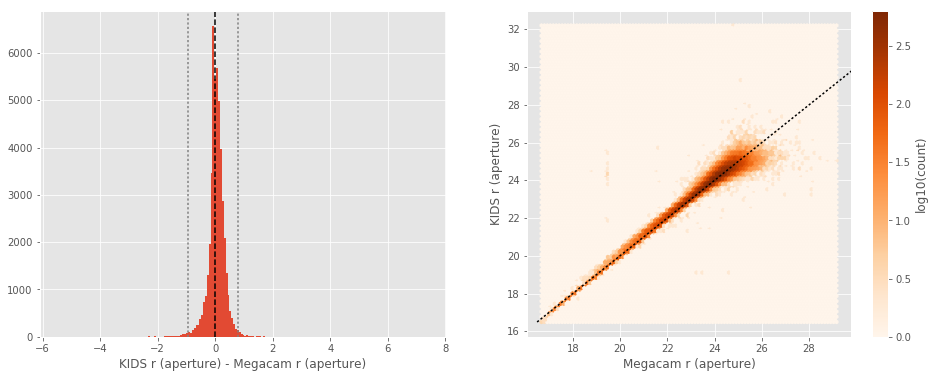

KIDS r (total) - Megacam r (total):
- Median: 0.11
- Median Absolute Deviation: 0.16
- 1% percentile: -0.9458788299560547
- 99% percentile: 1.3963567543029782


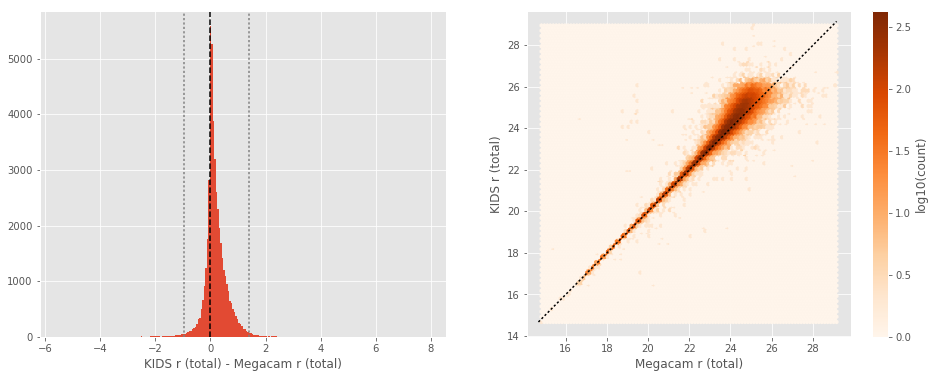

There are no overlapping magnitudes...
There are no overlapping magnitudes...
GPC1 r (aperture) - Megacam r (aperture):
- Median: -0.11
- Median Absolute Deviation: 0.17
- 1% percentile: -1.4606722831726073
- 99% percentile: 1.7027540779113717


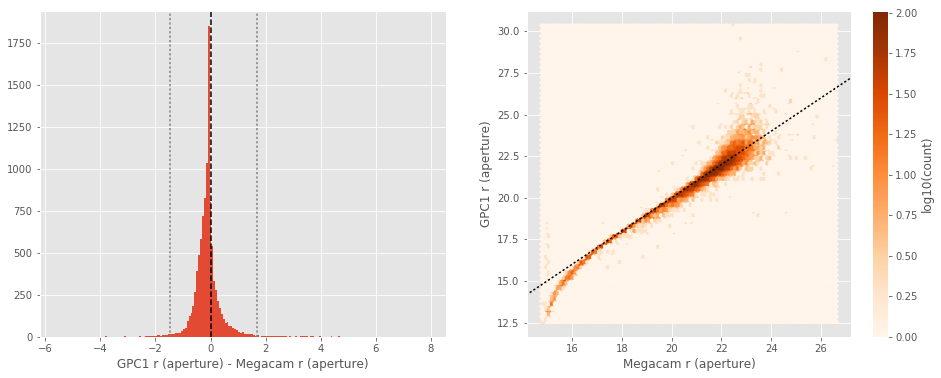

GPC1 r (total) - Megacam r (total):
- Median: 0.06
- Median Absolute Deviation: 0.11
- 1% percentile: -0.933329963684082
- 99% percentile: 0.8017000198364272


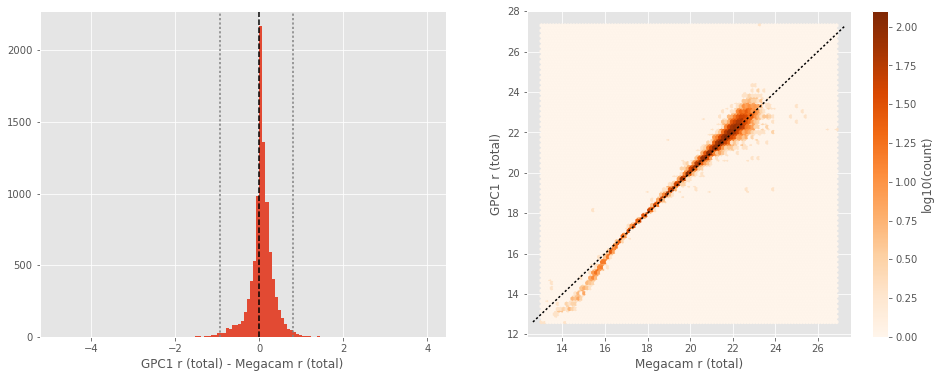

KIDS r (aperture) - DECam r (aperture):
- Median: -0.71
- Median Absolute Deviation: 0.44
- 1% percentile: -3.316265869140625
- 99% percentile: 0.5076443481445296


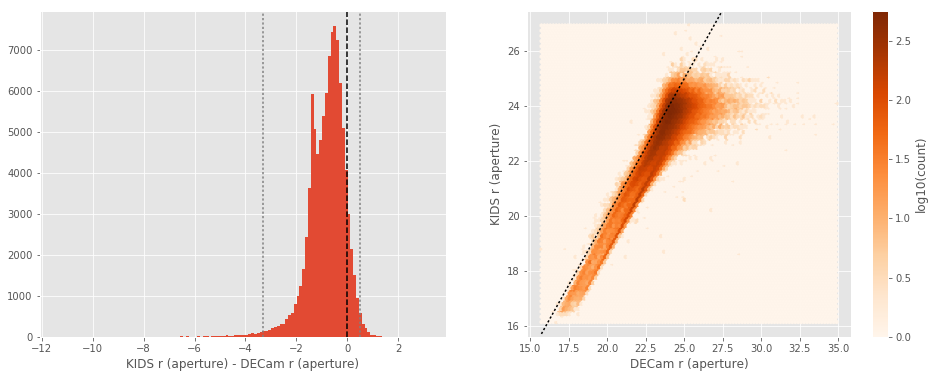

KIDS r (total) - DECam r (total):
- Median: -0.82
- Median Absolute Deviation: 0.43
- 1% percentile: -3.1780592346191407
- 99% percentile: 0.8013042068481434


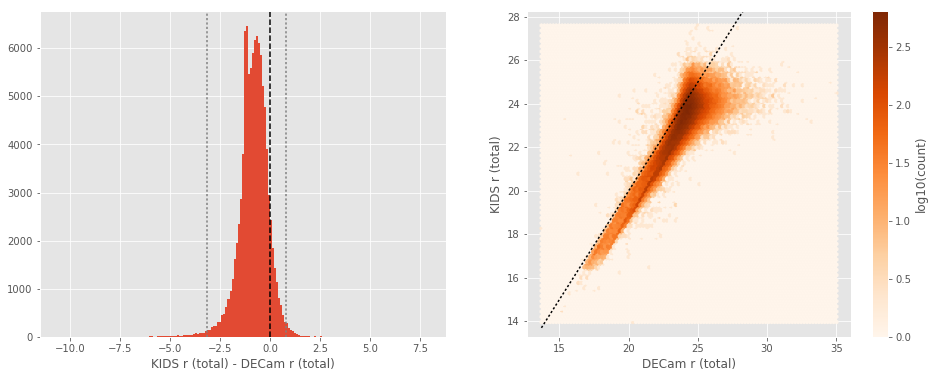

SUPRIME r (aperture) - DECam r (aperture):
- Median: -0.73
- Median Absolute Deviation: 0.43
- 1% percentile: -3.300041923522949
- 99% percentile: 0.7873371124267564


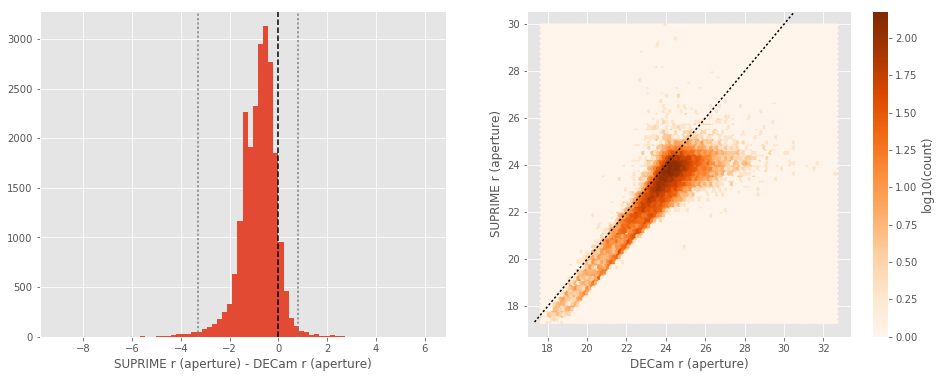

SUPRIME r (total) - DECam r (total):
- Median: -0.96
- Median Absolute Deviation: 0.38
- 1% percentile: -3.3988678741455076
- 99% percentile: 0.8562595176696578


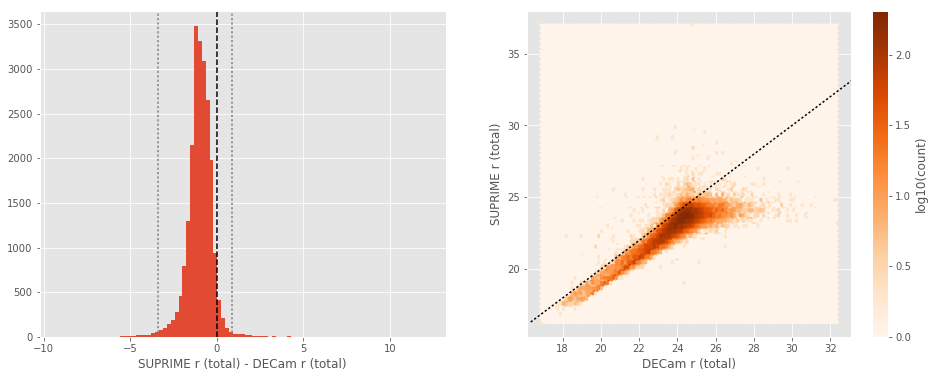

GPC1 r (aperture) - DECam r (aperture):
- Median: -1.12
- Median Absolute Deviation: 0.35
- 1% percentile: -2.8341312408447266
- 99% percentile: 0.71598247528078


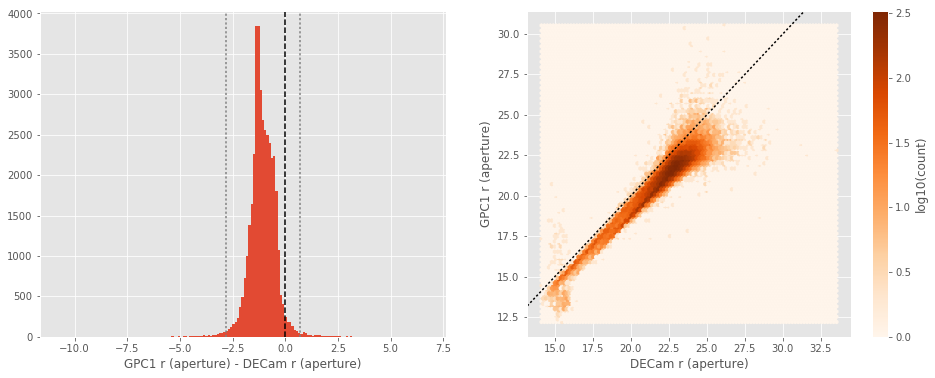

GPC1 r (total) - DECam r (total):
- Median: -0.94
- Median Absolute Deviation: 0.33
- 1% percentile: -2.462470397949219
- 99% percentile: 0.22533836364745874


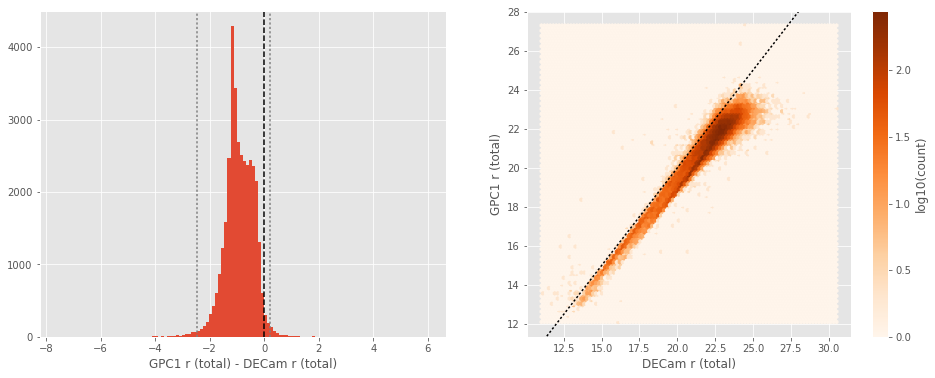

SUPRIME r (aperture) - KIDS r (aperture):
- Median: -0.03
- Median Absolute Deviation: 0.10
- 1% percentile: -0.7551362228393554
- 99% percentile: 0.916678867340081


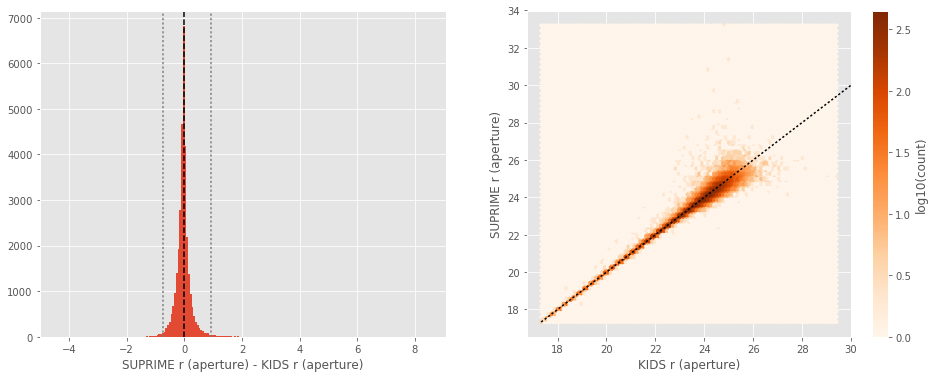

SUPRIME r (total) - KIDS r (total):
- Median: -0.17
- Median Absolute Deviation: 0.19
- 1% percentile: -1.7218556213378906
- 99% percentile: 1.3159934997558587


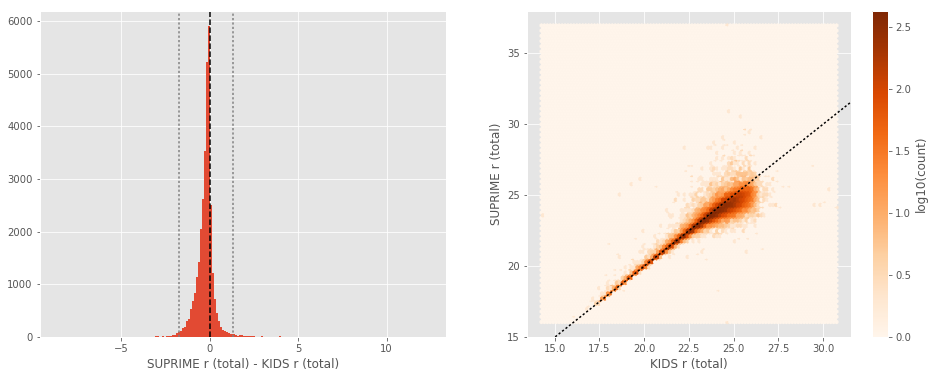

GPC1 r (aperture) - KIDS r (aperture):
- Median: -0.08
- Median Absolute Deviation: 0.22
- 1% percentile: -1.1677851867675781
- 99% percentile: 1.691014289855957


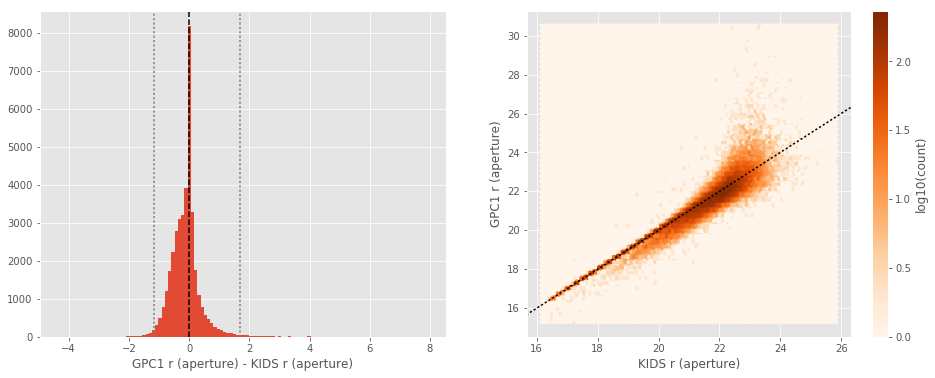

GPC1 r (total) - KIDS r (total):
- Median: 0.07
- Median Absolute Deviation: 0.10
- 1% percentile: -0.8327883911132813
- 99% percentile: 0.8588296508789073


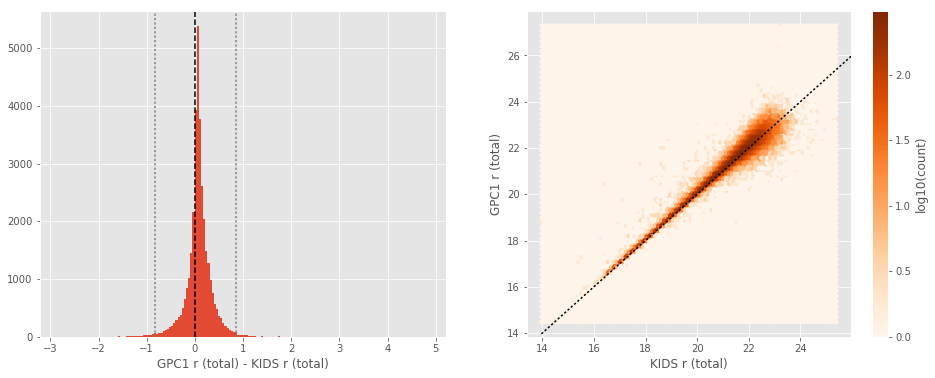

GPC1 r (aperture) - SUPRIME r (aperture):
- Median: -0.07
- Median Absolute Deviation: 0.24
- 1% percentile: -1.325166244506836
- 99% percentile: 1.7469988250732411


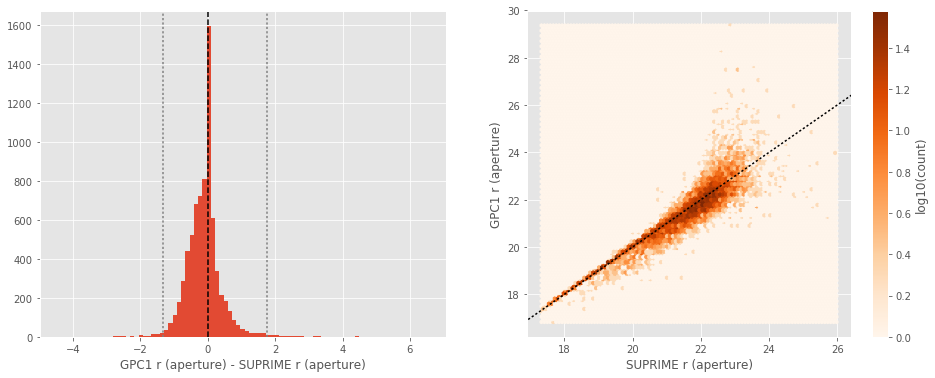

GPC1 r (total) - SUPRIME r (total):
- Median: 0.12
- Median Absolute Deviation: 0.12
- 1% percentile: -0.8253143310546874
- 99% percentile: 0.9016330718994142


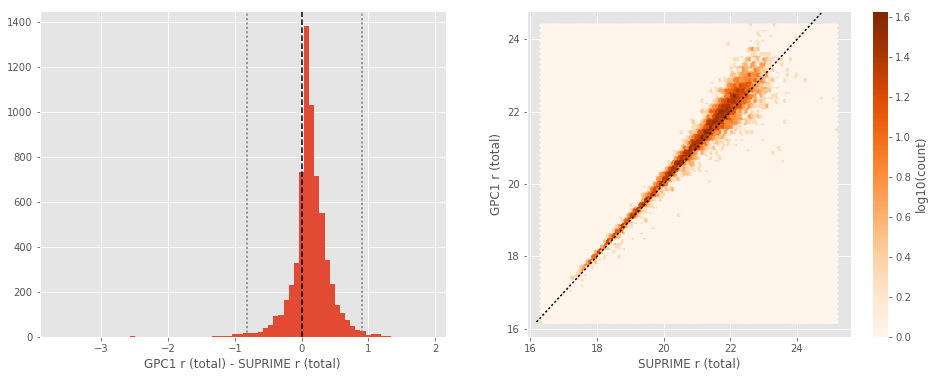

DECam i (aperture) - Megacam i (aperture):
- Median: 0.45
- Median Absolute Deviation: 0.33
- 1% percentile: -0.6996347427368164
- 99% percentile: 2.733561134338352


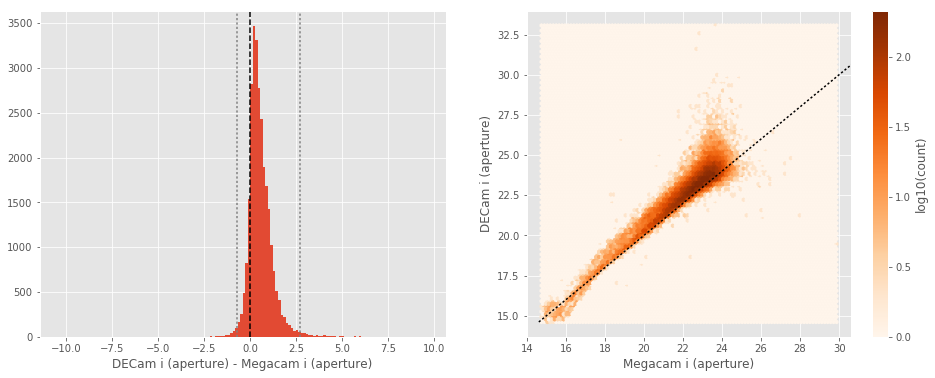

DECam i (total) - Megacam i (total):
- Median: 0.51
- Median Absolute Deviation: 0.32
- 1% percentile: -0.8218452262878418
- 99% percentile: 2.330417079925538


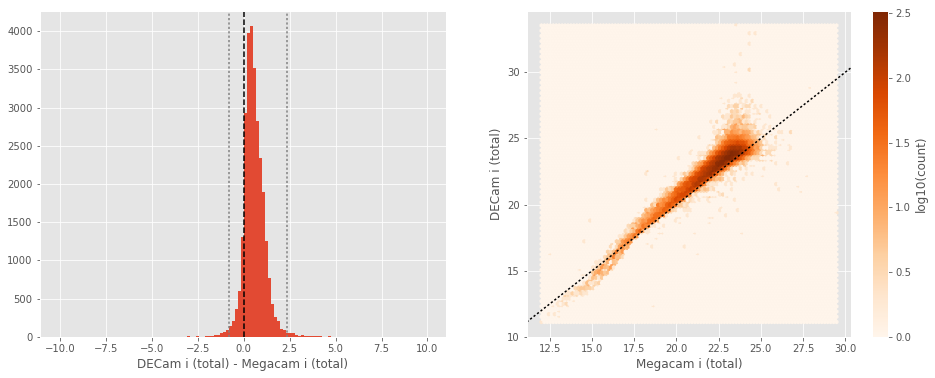

KIDS i (aperture) - Megacam i (aperture):
- Median: 0.07
- Median Absolute Deviation: 0.21
- 1% percentile: -1.4377883148193358
- 99% percentile: 2.0424331665039066


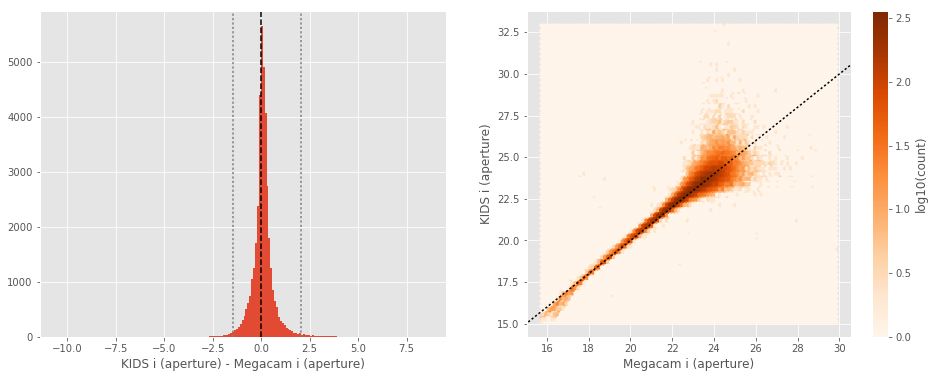

KIDS i (total) - Megacam i (total):
- Median: 0.17
- Median Absolute Deviation: 0.27
- 1% percentile: -1.3161162948608398
- 99% percentile: 3.060184936523437


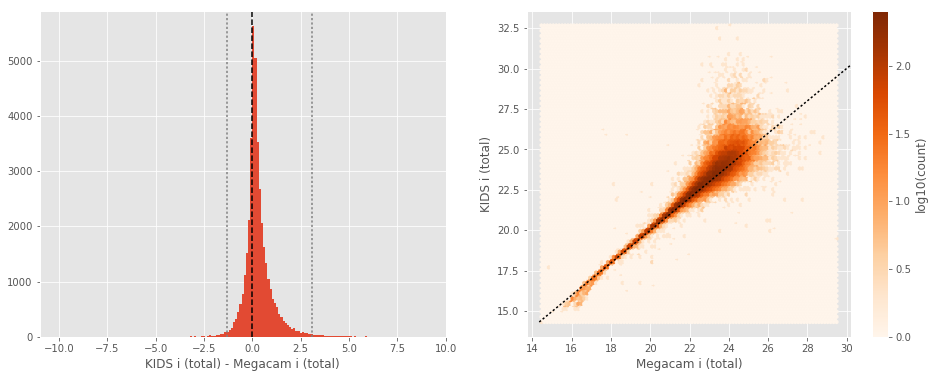

There are no overlapping magnitudes...
There are no overlapping magnitudes...
GPC1 i (aperture) - Megacam i (aperture):
- Median: -0.08
- Median Absolute Deviation: 0.14
- 1% percentile: -1.4246997833251953
- 99% percentile: 1.106808586120608


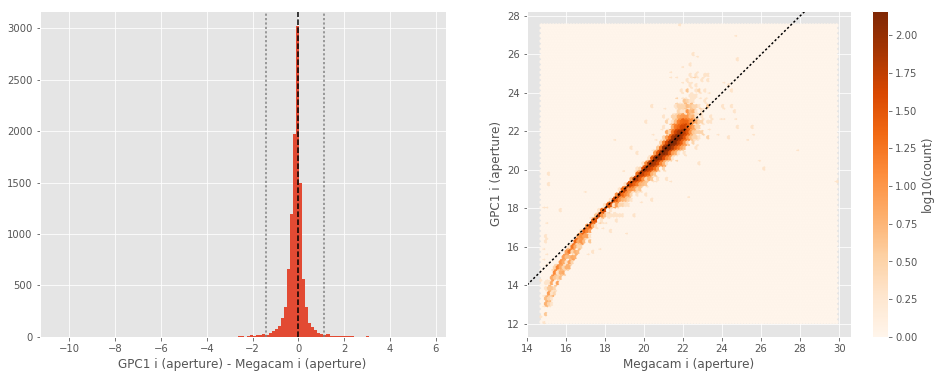

GPC1 i (total) - Megacam i (total):
- Median: 0.10
- Median Absolute Deviation: 0.09
- 1% percentile: -1.0008413982391358
- 99% percentile: 0.7073256874084453


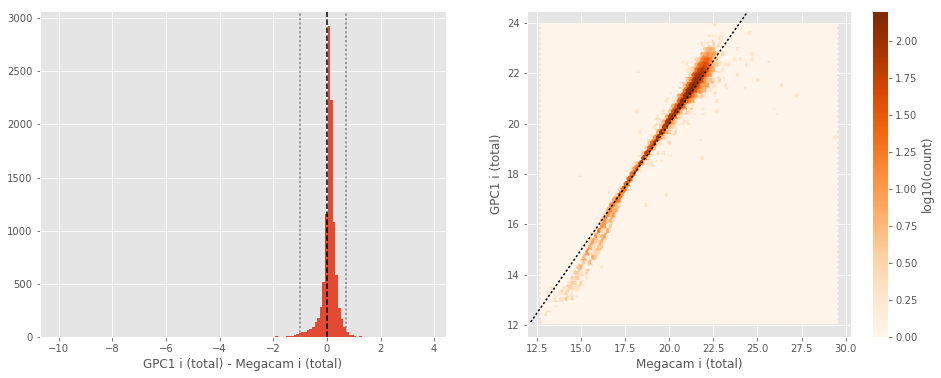

KIDS i (aperture) - DECam i (aperture):
- Median: -0.33
- Median Absolute Deviation: 0.34
- 1% percentile: -2.357893371582031
- 99% percentile: 1.1937634277343756


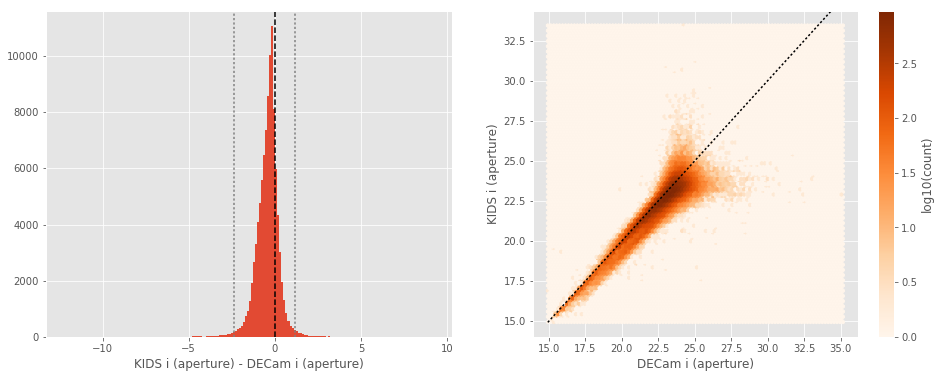

KIDS i (total) - DECam i (total):
- Median: -0.35
- Median Absolute Deviation: 0.33
- 1% percentile: -1.6827265930175779
- 99% percentile: 2.027771987915031


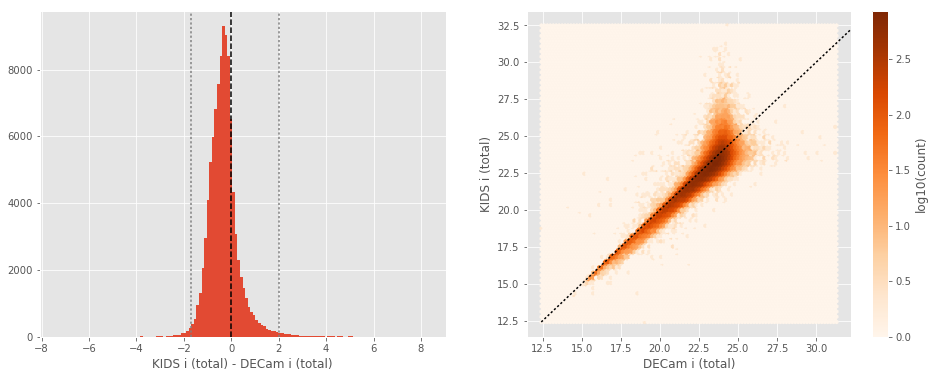

SUPRIME i (aperture) - DECam i (aperture):
- Median: -0.42
- Median Absolute Deviation: 0.32
- 1% percentile: -2.5161280059814453
- 99% percentile: 0.7483397674560556


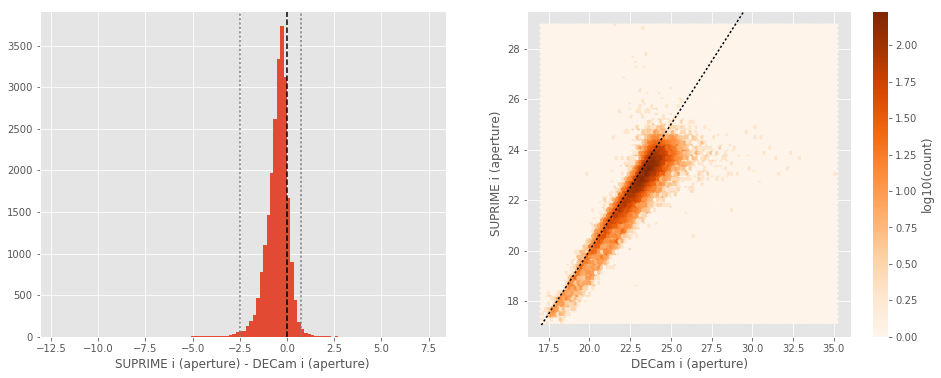

SUPRIME i (total) - DECam i (total):
- Median: -0.58
- Median Absolute Deviation: 0.29
- 1% percentile: -2.2072229766845703
- 99% percentile: 1.0810286712646513


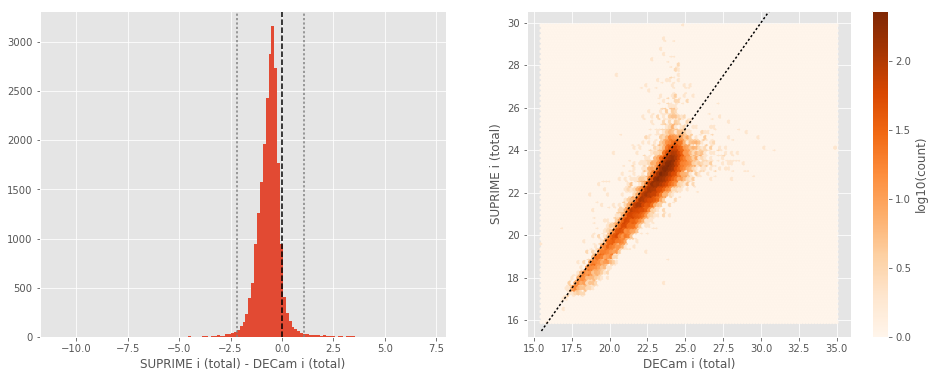

GPC1 i (aperture) - DECam i (aperture):
- Median: -0.53
- Median Absolute Deviation: 0.29
- 1% percentile: -2.1201485443115233
- 99% percentile: 0.6080709838867189


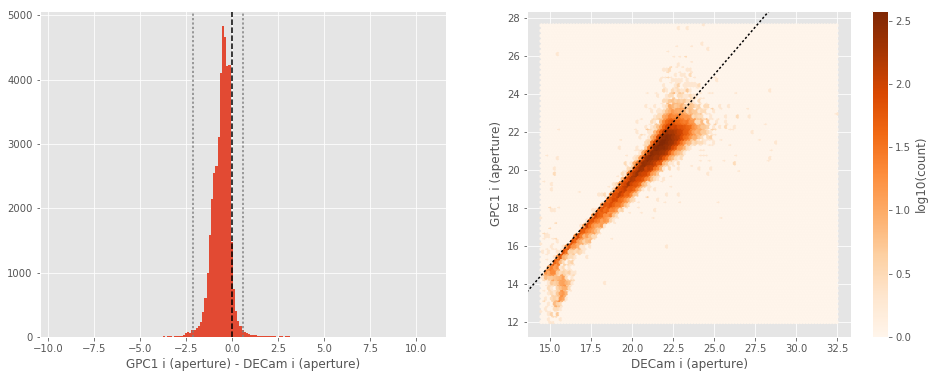

GPC1 i (total) - DECam i (total):
- Median: -0.33
- Median Absolute Deviation: 0.28
- 1% percentile: -1.5868976593017579
- 99% percentile: 0.48688774108886657


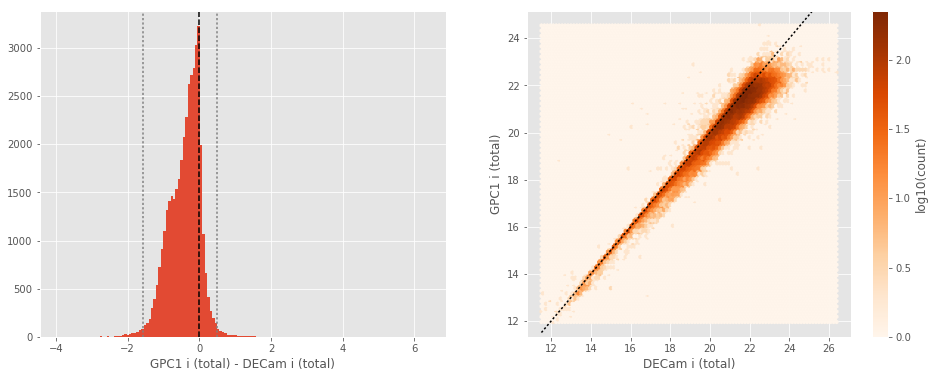

SUPRIME i (aperture) - KIDS i (aperture):
- Median: -0.08
- Median Absolute Deviation: 0.16
- 1% percentile: -2.0235227966308593
- 99% percentile: 1.311113510131837


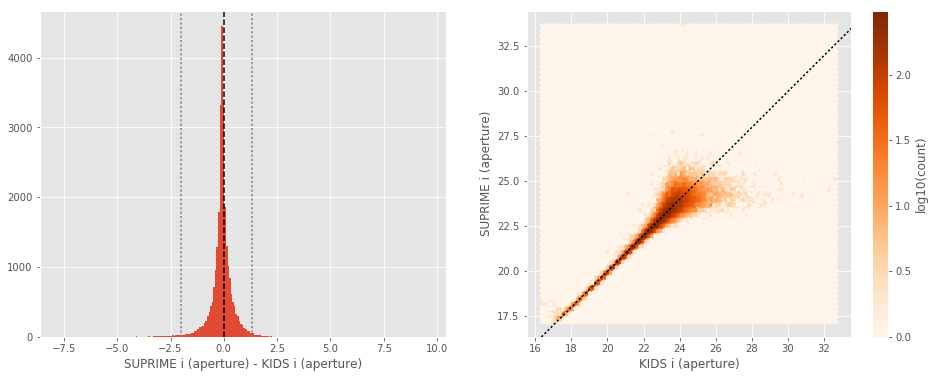

SUPRIME i (total) - KIDS i (total):
- Median: -0.24
- Median Absolute Deviation: 0.27
- 1% percentile: -3.0933902740478514
- 99% percentile: 1.4969895935058597


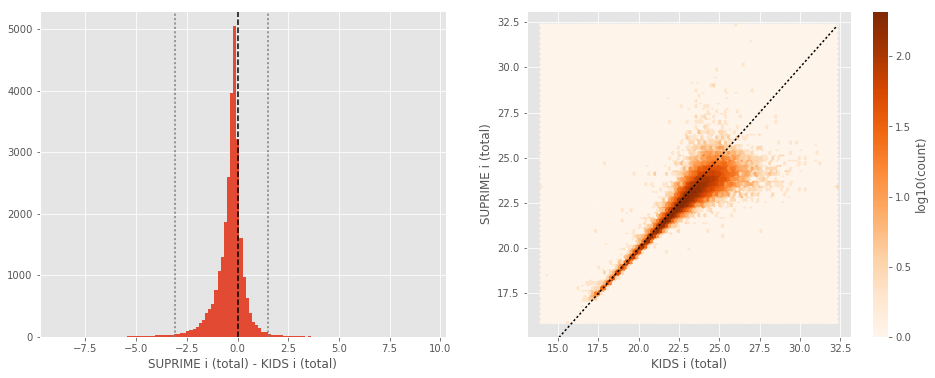

GPC1 i (aperture) - KIDS i (aperture):
- Median: -0.08
- Median Absolute Deviation: 0.16
- 1% percentile: -1.0400075912475586
- 99% percentile: 0.9060783386230469


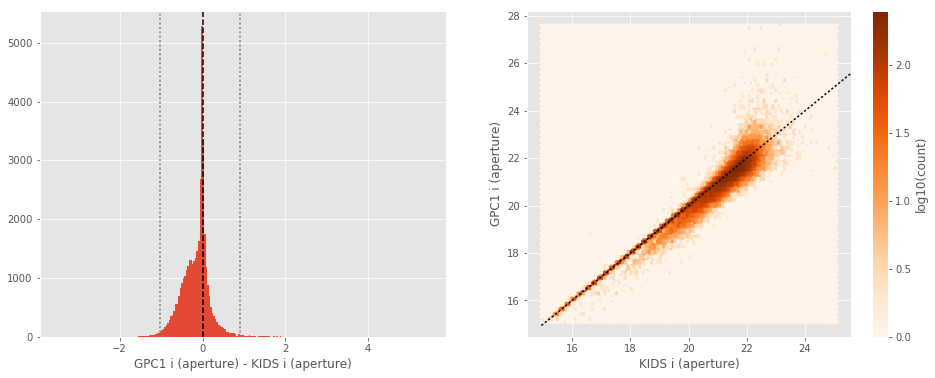

GPC1 i (total) - KIDS i (total):
- Median: 0.04
- Median Absolute Deviation: 0.09
- 1% percentile: -0.8132486724853516
- 99% percentile: 0.7236529541015617


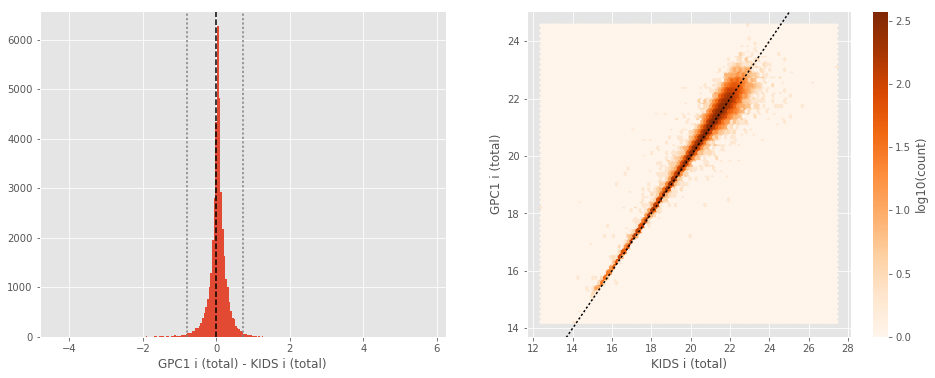

GPC1 i (aperture) - SUPRIME i (aperture):
- Median: -0.03
- Median Absolute Deviation: 0.19
- 1% percentile: -1.0692421531677248
- 99% percentile: 1.0051871490478532


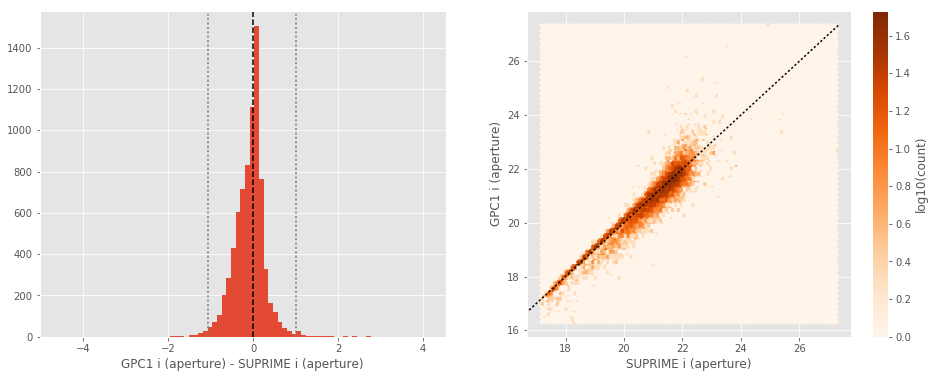

GPC1 i (total) - SUPRIME i (total):
- Median: 0.20
- Median Absolute Deviation: 0.10
- 1% percentile: -0.5601342391967773
- 99% percentile: 0.786589946746826


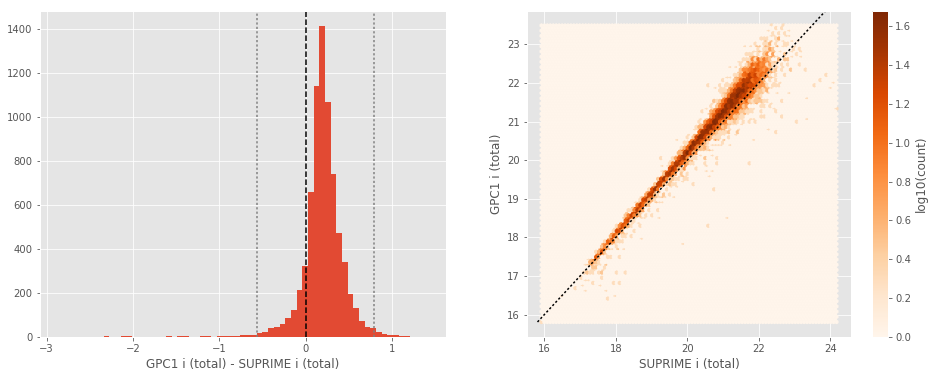

There are no overlapping magnitudes...
There are no overlapping magnitudes...
There are no overlapping magnitudes...
There are no overlapping magnitudes...
GPC1 z (aperture) - Megacam z (aperture):
- Median: -0.11
- Median Absolute Deviation: 0.13
- 1% percentile: -1.0591611003875732
- 99% percentile: 1.273731708526612


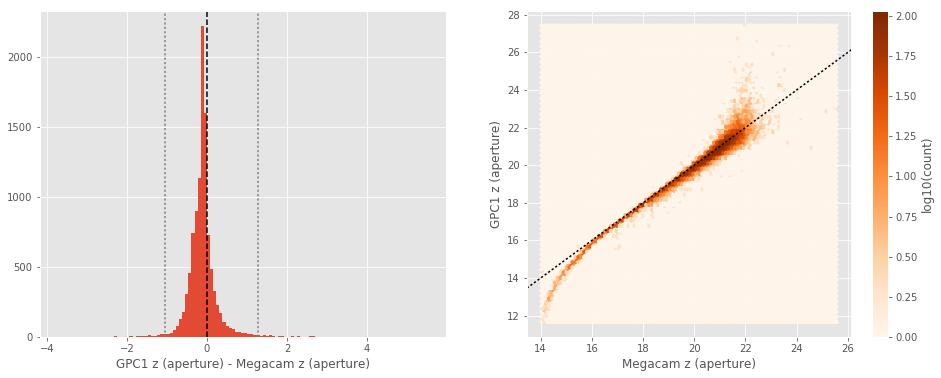

GPC1 z (total) - Megacam z (total):
- Median: 0.07
- Median Absolute Deviation: 0.10
- 1% percentile: -0.6978427410125732
- 99% percentile: 0.8048007583618166


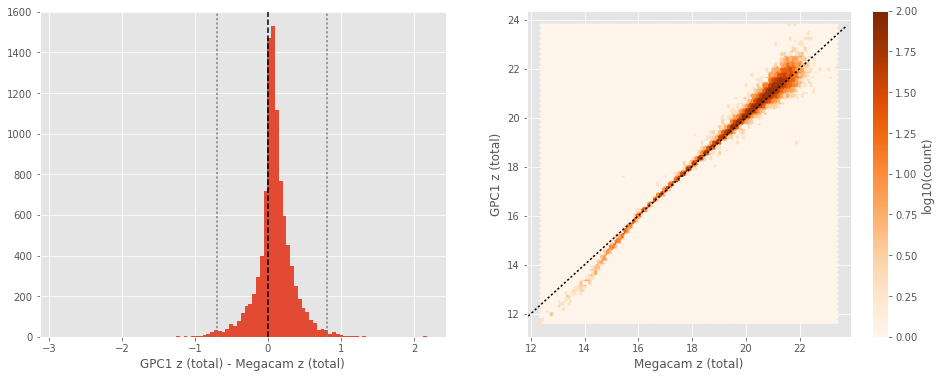

There are no overlapping magnitudes...
There are no overlapping magnitudes...
There are no overlapping magnitudes...
There are no overlapping magnitudes...
GPC1 z (aperture) - SUPRIME z (aperture):
- Median: 0.02
- Median Absolute Deviation: 0.20
- 1% percentile: -1.040619201660156
- 99% percentile: 1.558902969360351


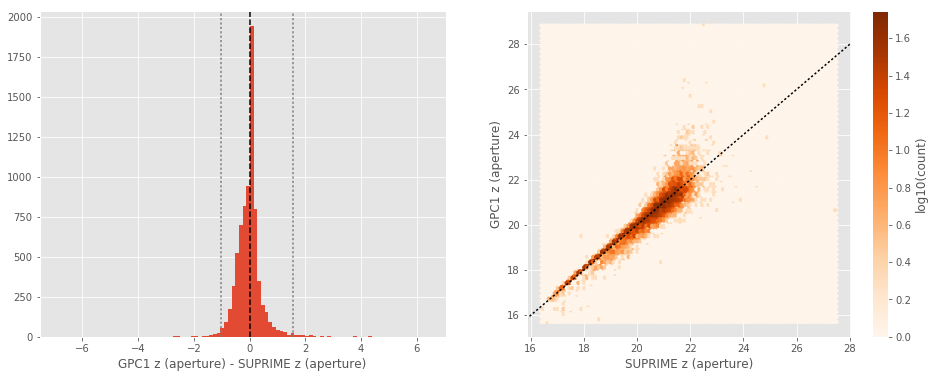

GPC1 z (total) - SUPRIME z (total):
- Median: 0.24
- Median Absolute Deviation: 0.11
- 1% percentile: -0.5942254638671874
- 99% percentile: 1.0106868362426773


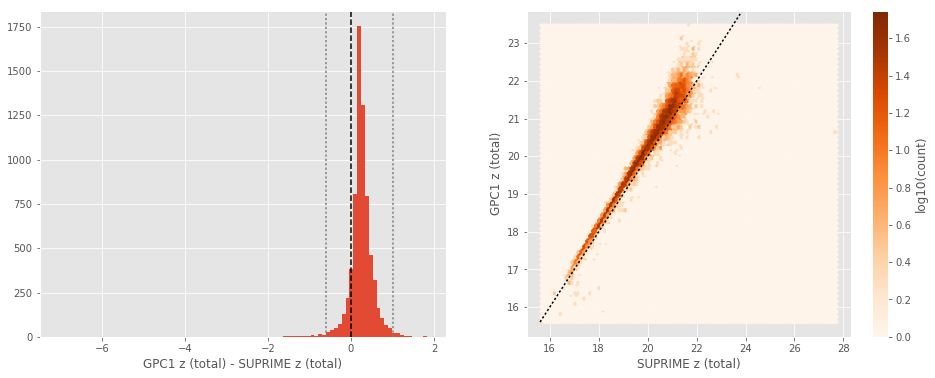

SUPRIME y (aperture) - DECam y (aperture):
- Median: -0.08
- Median Absolute Deviation: 0.22
- 1% percentile: -2.6783448028564454
- 99% percentile: 1.2915288162231442


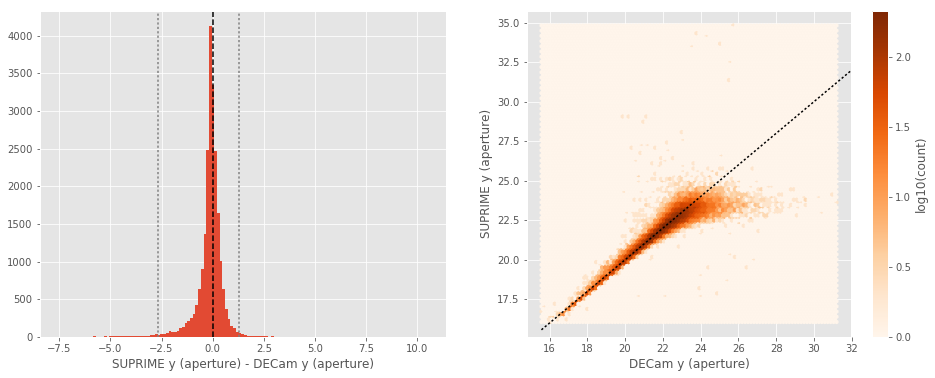

SUPRIME y (total) - DECam y (total):
- Median: -0.14
- Median Absolute Deviation: 0.17
- 1% percentile: -1.9865094184875487
- 99% percentile: 1.4759642601013183


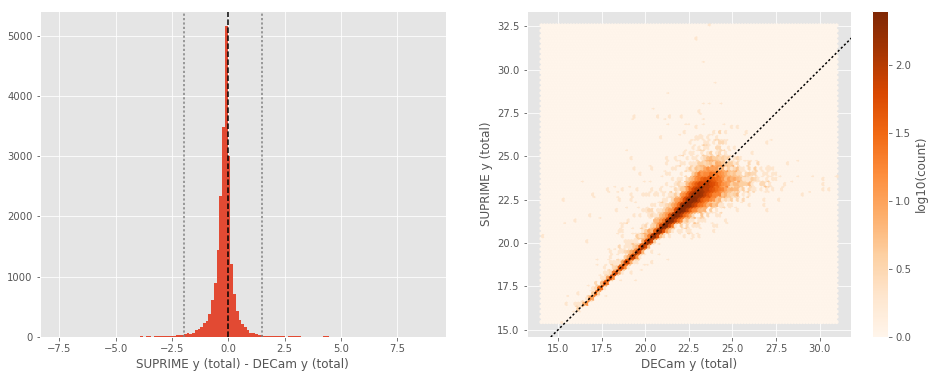

GPC1 y (aperture) - DECam y (aperture):
- Median: -0.08
- Median Absolute Deviation: 0.15
- 1% percentile: -2.0140417671203616
- 99% percentile: 2.1468558883666855


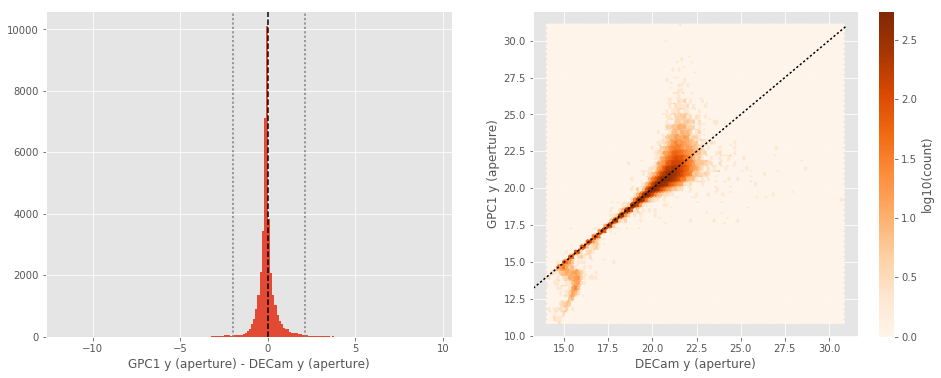

GPC1 y (total) - DECam y (total):
- Median: 0.14
- Median Absolute Deviation: 0.12
- 1% percentile: -0.7472444152832032
- 99% percentile: 1.057039203643799


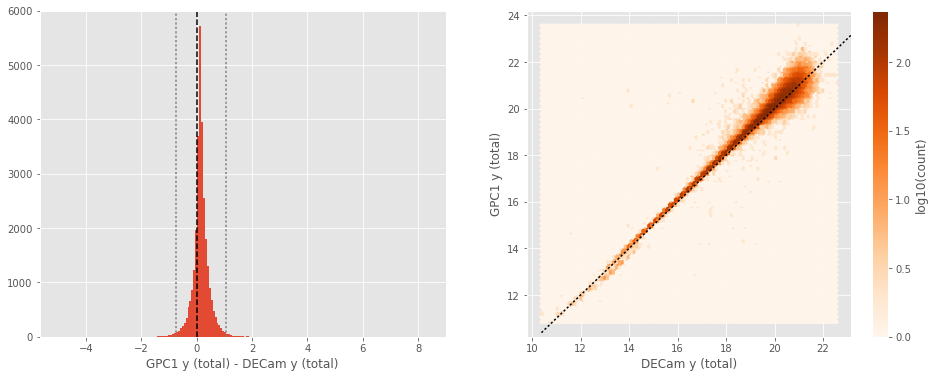

GPC1 y (aperture) - SUPRIME y (aperture):
- Median: -0.04
- Median Absolute Deviation: 0.24
- 1% percentile: -1.2530419158935548
- 99% percentile: 2.113035202026367


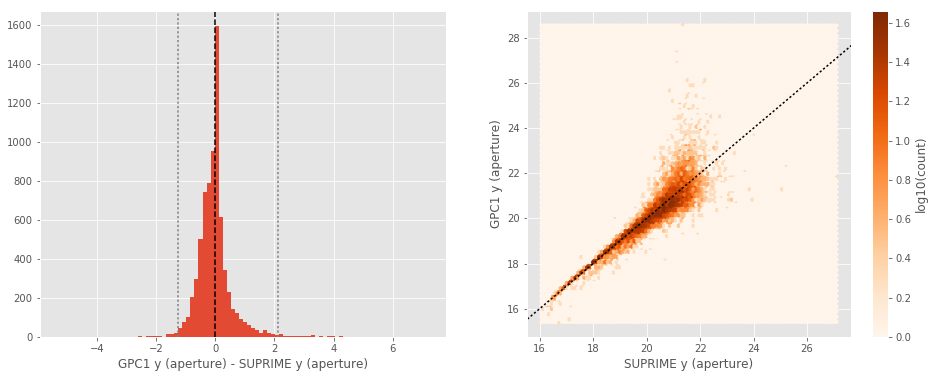

GPC1 y (total) - SUPRIME y (total):
- Median: 0.21
- Median Absolute Deviation: 0.13
- 1% percentile: -0.6995032501220703
- 99% percentile: 1.0842645263671868


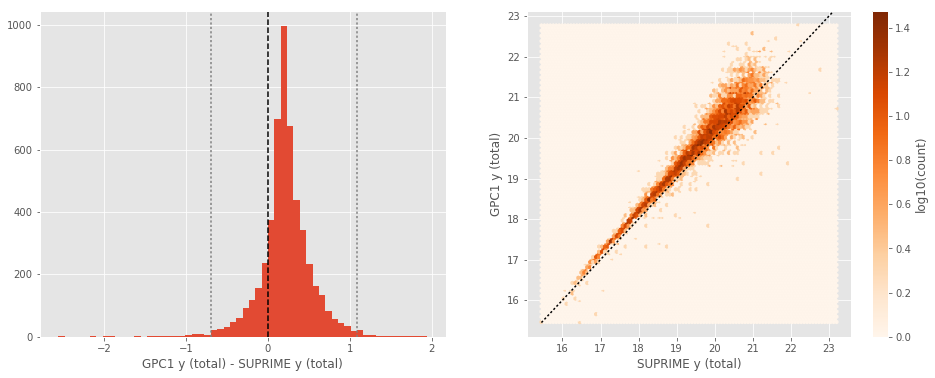

In [10]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [11]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [19]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_GAMA-09.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

Megacam u (aperture) - SDSS u (fiberMag):
- Median: -0.17
- Median Absolute Deviation: 0.57
- 1% percentile: -1.9312037467956542
- 99% percentile: 3.5240406990051265


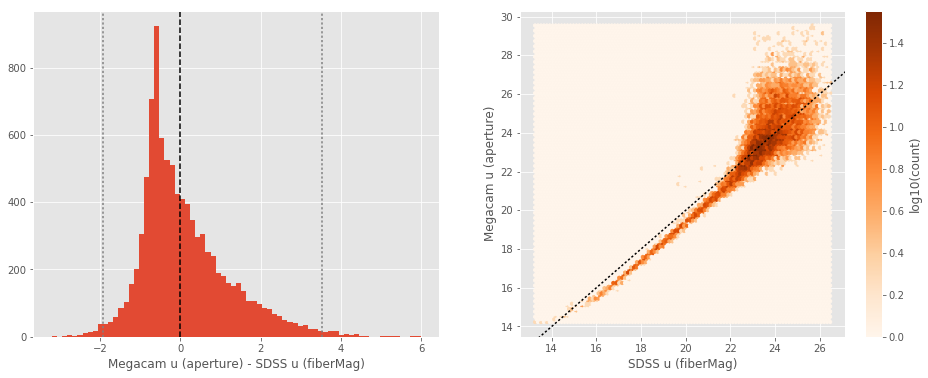

Megacam u (total) - SDSS u (petroMag):
- Median: -0.17
- Median Absolute Deviation: 0.57
- 1% percentile: -1.9312037467956542
- 99% percentile: 3.5240406990051265


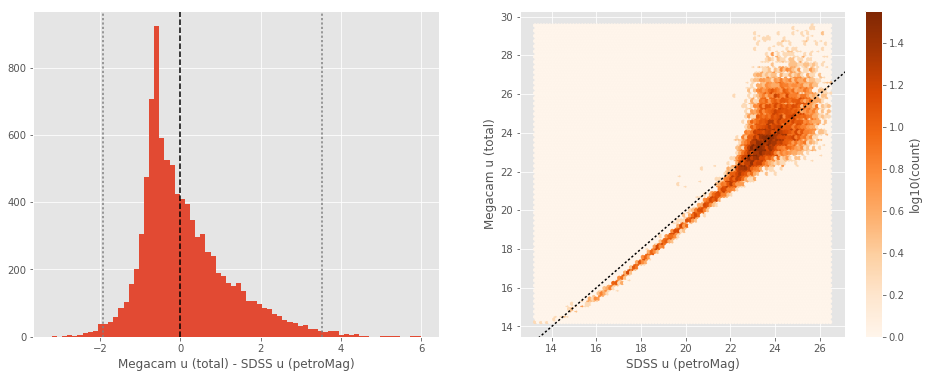

KIDS u (aperture) - SDSS u (fiberMag):
- Median: 0.00
- Median Absolute Deviation: 0.39
- 1% percentile: -1.5801190757751464
- 99% percentile: 3.026579189300538


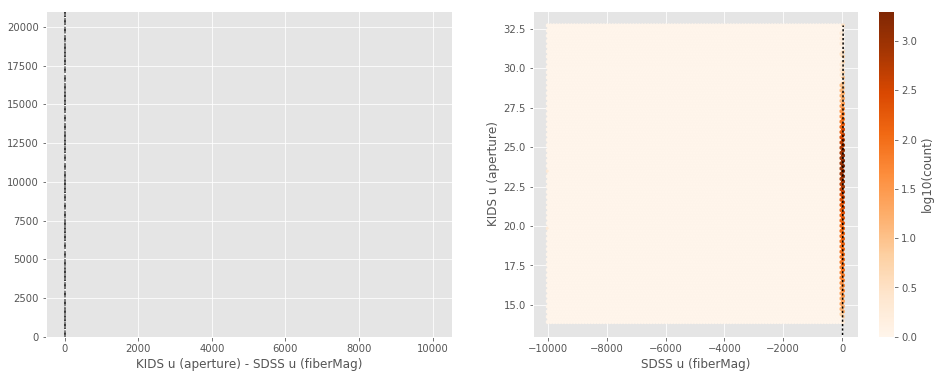

KIDS u (total) - SDSS u (petroMag):
- Median: 0.00
- Median Absolute Deviation: 0.39
- 1% percentile: -1.5801190757751464
- 99% percentile: 3.026579189300538


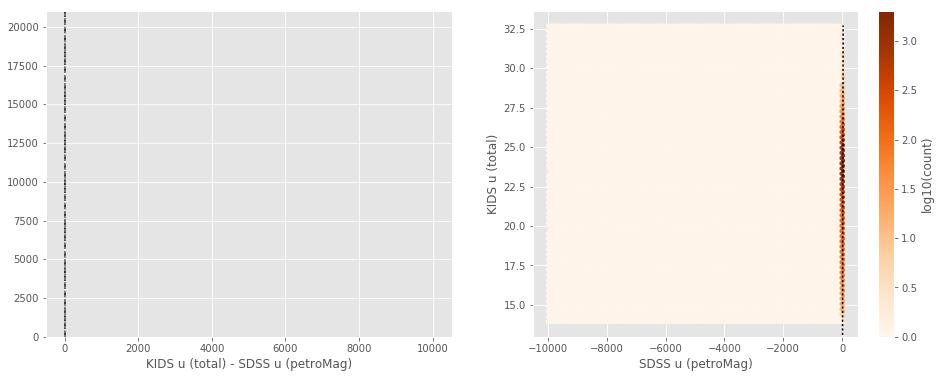

Megacam g (aperture) - SDSS g (fiberMag):
- Median: -0.36
- Median Absolute Deviation: 0.13
- 1% percentile: -1.1475047492980956
- 99% percentile: 1.0391851997375487


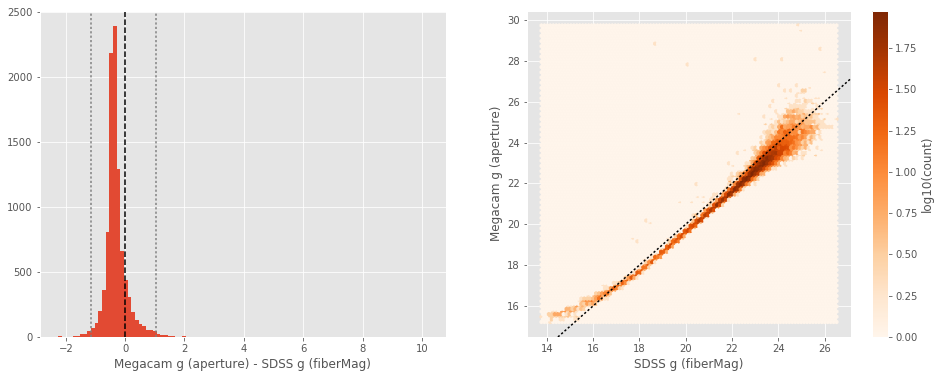

Megacam g (total) - SDSS g (petroMag):
- Median: -0.36
- Median Absolute Deviation: 0.13
- 1% percentile: -1.1475047492980956
- 99% percentile: 1.0391851997375487


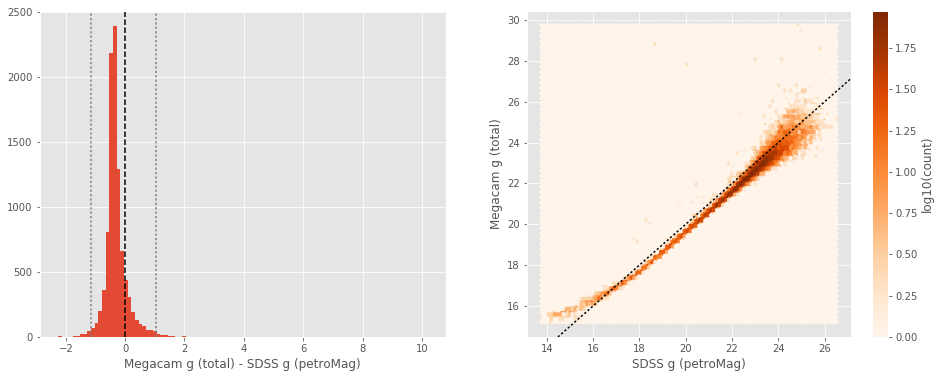

KIDS g (aperture) - SDSS g (fiberMag):
- Median: -0.22
- Median Absolute Deviation: 0.14
- 1% percentile: -0.9989104270935059
- 99% percentile: 1.082808494567871


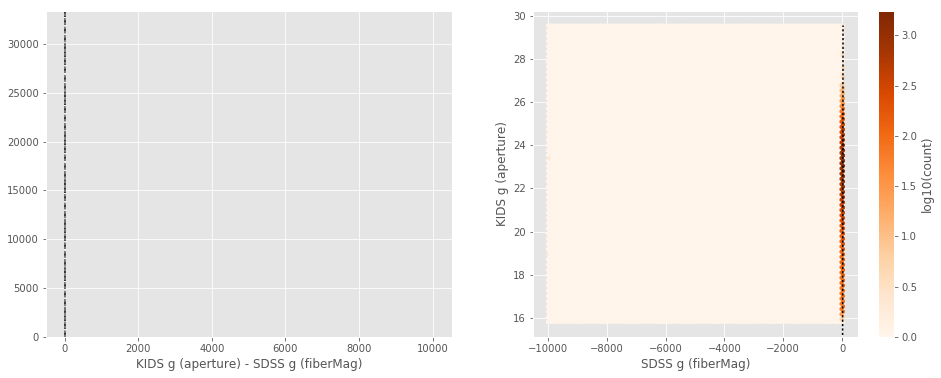

KIDS g (total) - SDSS g (petroMag):
- Median: -0.22
- Median Absolute Deviation: 0.14
- 1% percentile: -0.9989104270935059
- 99% percentile: 1.082808494567871


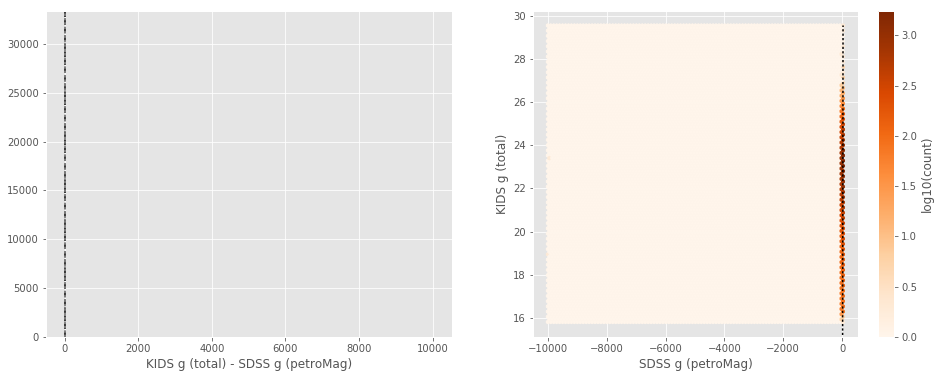

SUPRIME g (aperture) - SDSS g (fiberMag):
- Median: -0.32
- Median Absolute Deviation: 0.17
- 1% percentile: -1.2192895698547364
- 99% percentile: 1.050040225982666


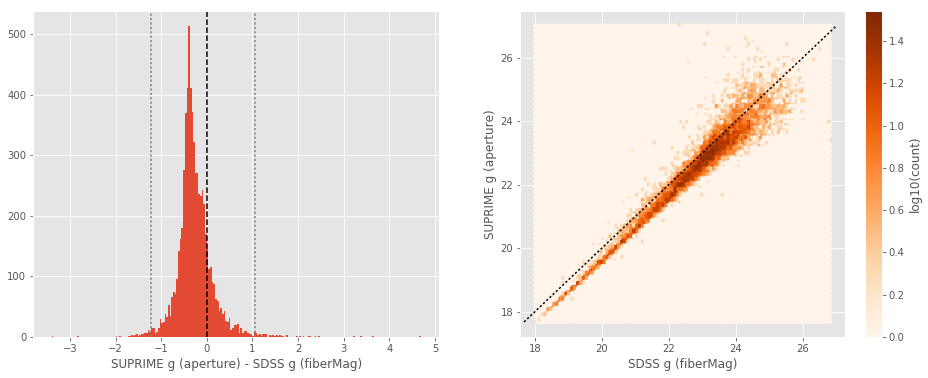

SUPRIME g (total) - SDSS g (petroMag):
- Median: -0.32
- Median Absolute Deviation: 0.17
- 1% percentile: -1.2192895698547364
- 99% percentile: 1.050040225982666


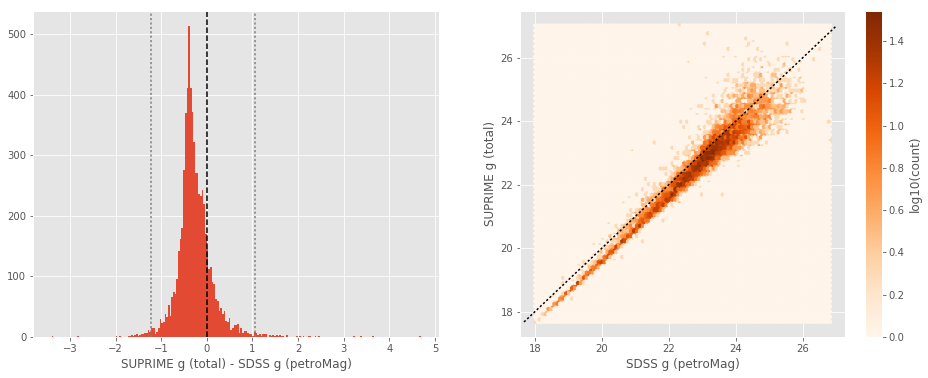

GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.46
- Median Absolute Deviation: 0.22
- 1% percentile: -1.9128516578674315
- 99% percentile: 2.164964199066162


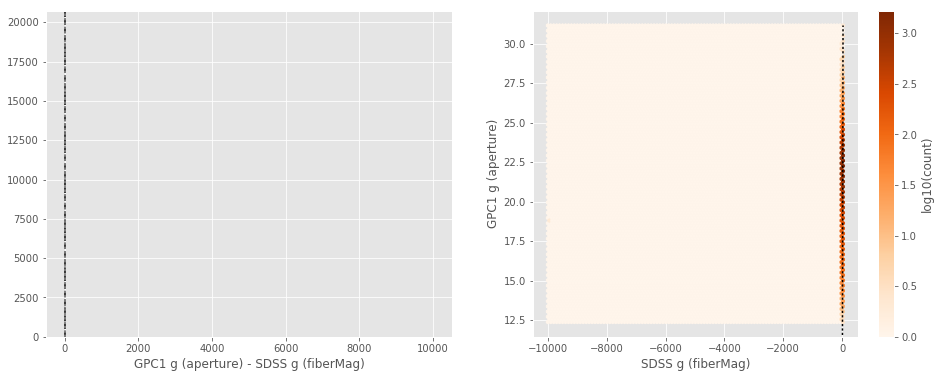

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.46
- Median Absolute Deviation: 0.22
- 1% percentile: -1.9128516578674315
- 99% percentile: 2.164964199066162


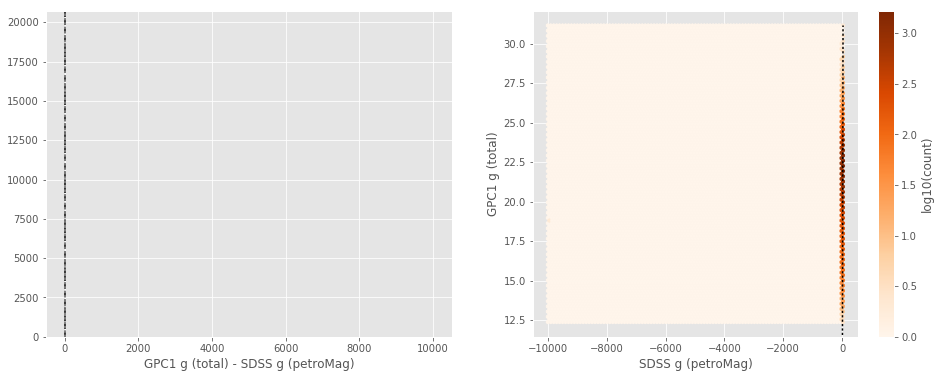

Megacam r (aperture) - SDSS r (fiberMag):
- Median: -0.26
- Median Absolute Deviation: 0.07
- 1% percentile: -0.9326198387145996
- 99% percentile: 0.6168956565856936


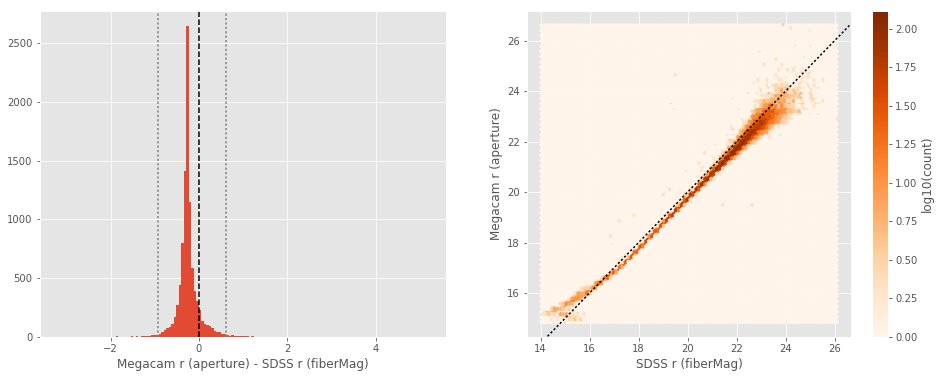

Megacam r (total) - SDSS r (petroMag):
- Median: -0.26
- Median Absolute Deviation: 0.07
- 1% percentile: -0.9326198387145996
- 99% percentile: 0.6168956565856936


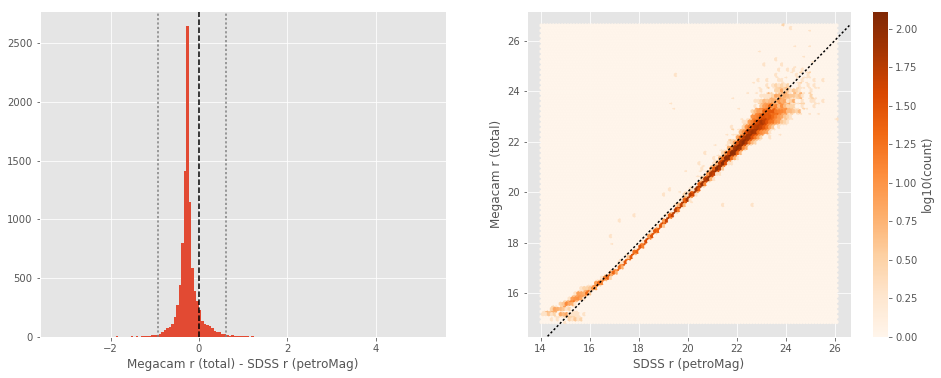

DECam r (aperture) - SDSS r (fiberMag):
- Median: 0.70
- Median Absolute Deviation: 0.36
- 1% percentile: -0.3412965393066406
- 99% percentile: 2.5977881431579495


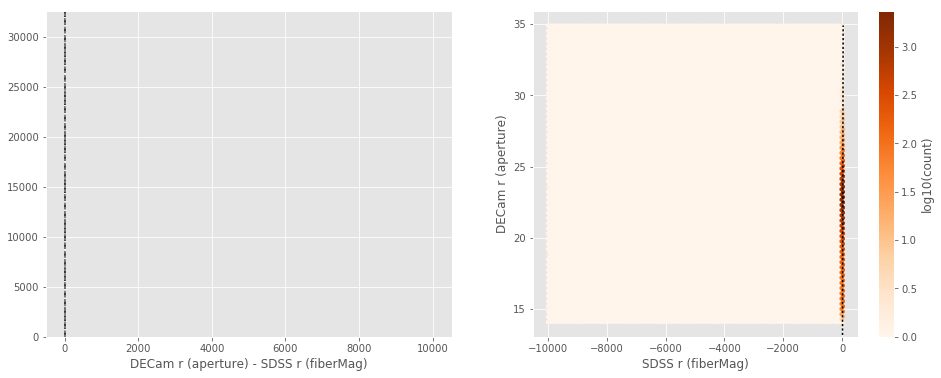

DECam r (total) - SDSS r (petroMag):
- Median: 0.70
- Median Absolute Deviation: 0.36
- 1% percentile: -0.3412965393066406
- 99% percentile: 2.5977881431579495


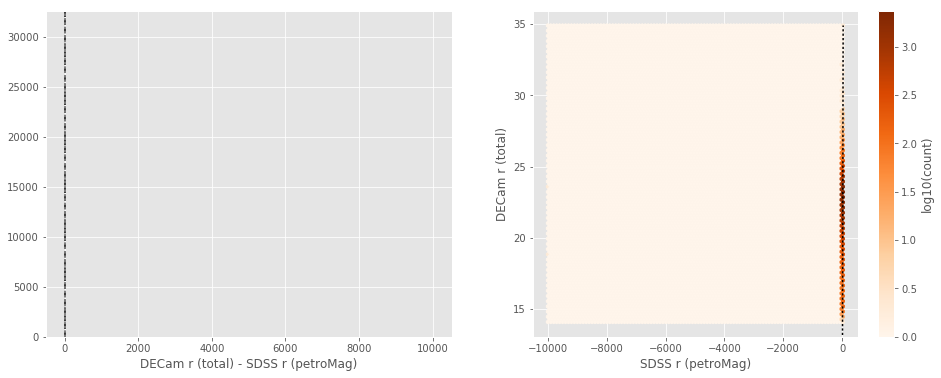

KIDS r (aperture) - SDSS r (fiberMag):
- Median: -0.28
- Median Absolute Deviation: 0.10
- 1% percentile: -0.9416389465332031
- 99% percentile: 0.4123392105102539


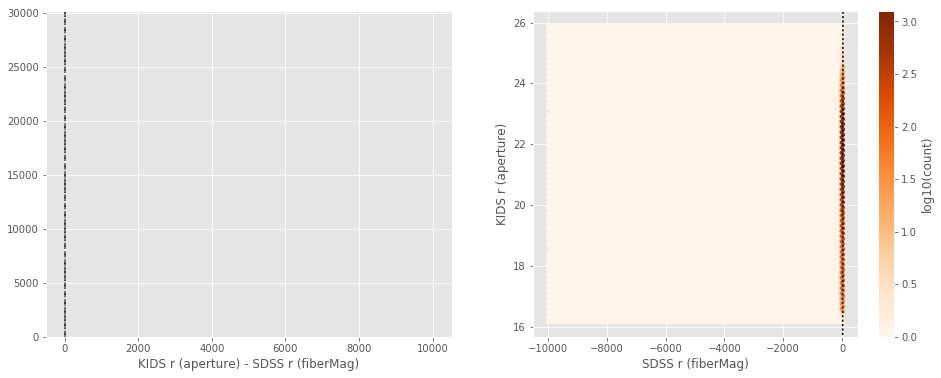

KIDS r (total) - SDSS r (petroMag):
- Median: -0.28
- Median Absolute Deviation: 0.10
- 1% percentile: -0.9416389465332031
- 99% percentile: 0.4123392105102539


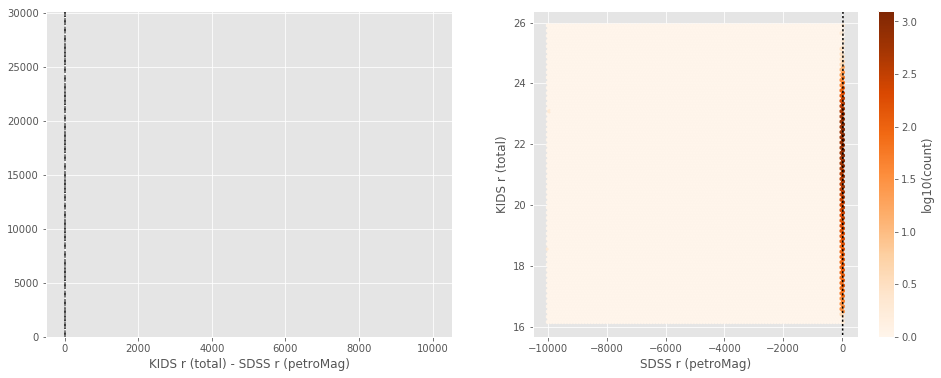

SUPRIME r (aperture) - SDSS r (fiberMag):
- Median: -0.28
- Median Absolute Deviation: 0.11
- 1% percentile: -0.9338239669799804
- 99% percentile: 0.597110843658445


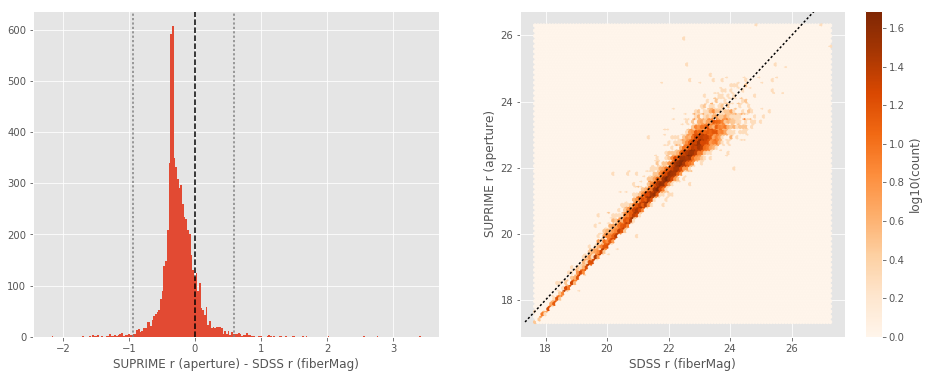

SUPRIME r (total) - SDSS r (petroMag):
- Median: -0.28
- Median Absolute Deviation: 0.11
- 1% percentile: -0.9338239669799804
- 99% percentile: 0.597110843658445


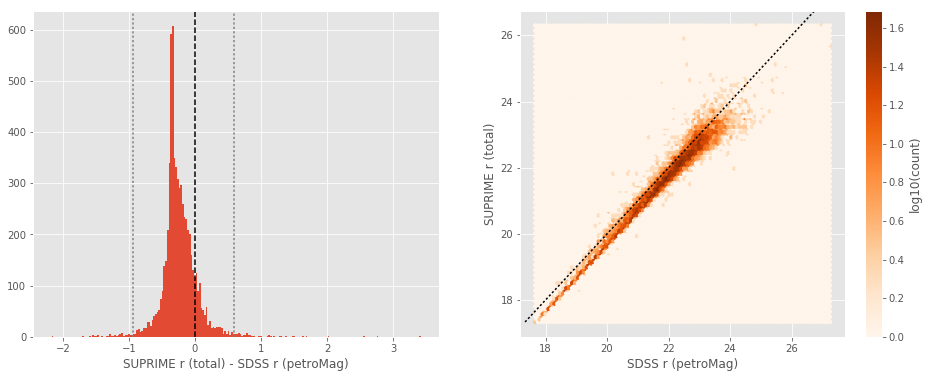

GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.36
- Median Absolute Deviation: 0.15
- 1% percentile: -1.4541948127746582
- 99% percentile: 1.327687282562254


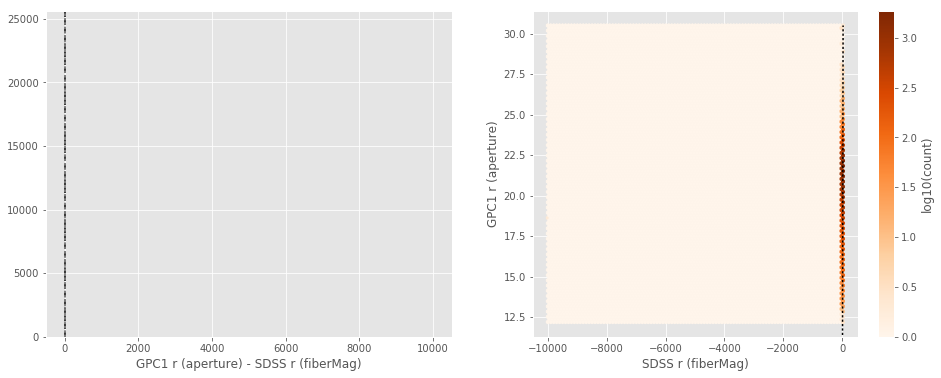

GPC1 r (total) - SDSS r (petroMag):
- Median: -0.36
- Median Absolute Deviation: 0.15
- 1% percentile: -1.4541948127746582
- 99% percentile: 1.327687282562254


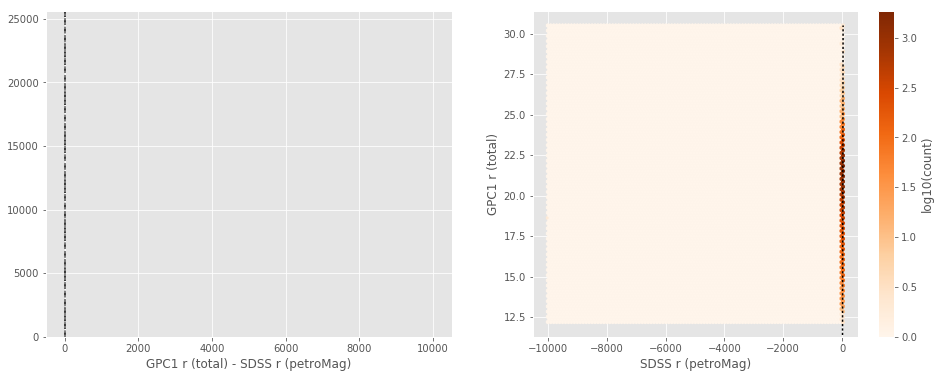

Megacam i (aperture) - SDSS i (fiberMag):
- Median: -0.30
- Median Absolute Deviation: 0.08
- 1% percentile: -0.8939273834228516
- 99% percentile: 0.7821575164794923


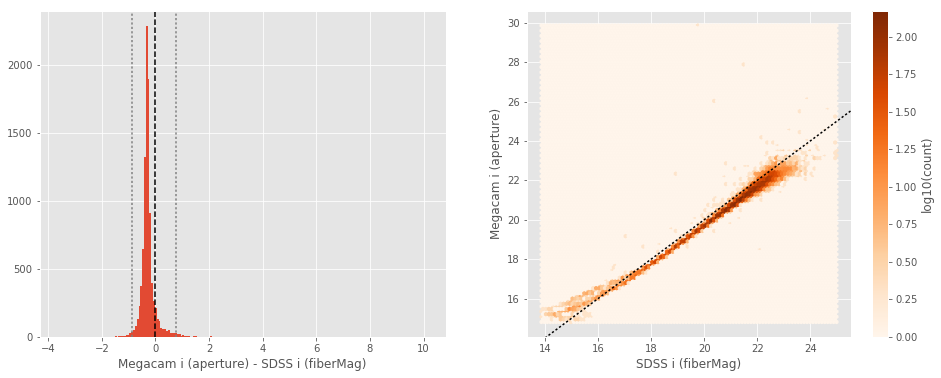

Megacam i (total) - SDSS i (petroMag):
- Median: -0.30
- Median Absolute Deviation: 0.08
- 1% percentile: -0.8939273834228516
- 99% percentile: 0.7821575164794923


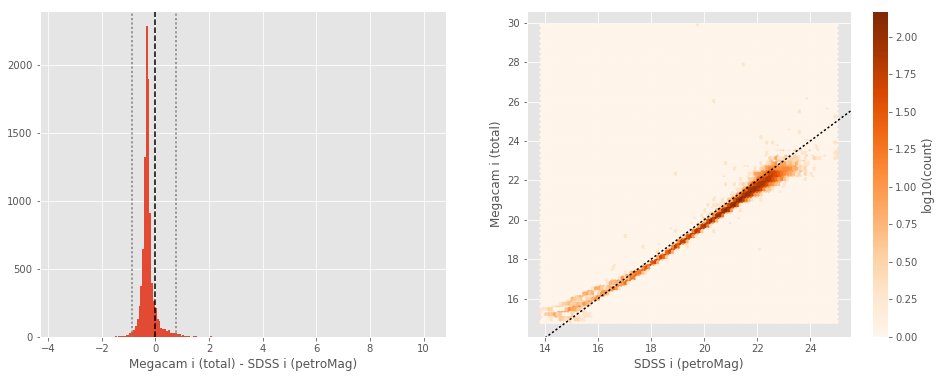

DECam i (aperture) - SDSS i (fiberMag):
- Median: 0.08
- Median Absolute Deviation: 0.26
- 1% percentile: -0.67564790725708
- 99% percentile: 1.6154850482940675


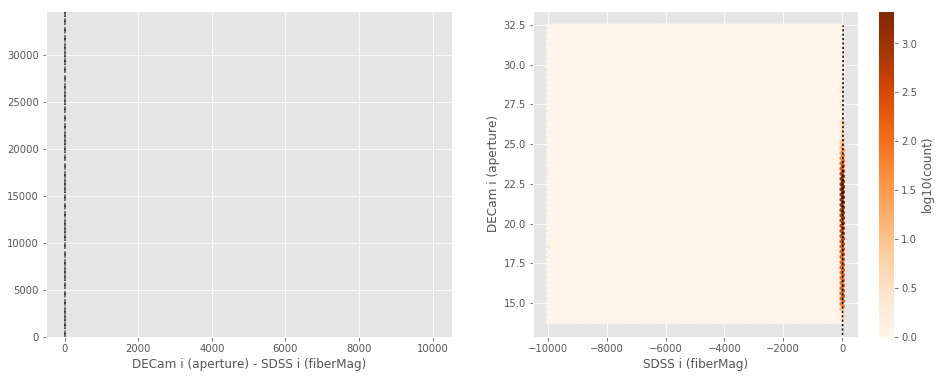

DECam i (total) - SDSS i (petroMag):
- Median: 0.08
- Median Absolute Deviation: 0.26
- 1% percentile: -0.67564790725708
- 99% percentile: 1.6154850482940675


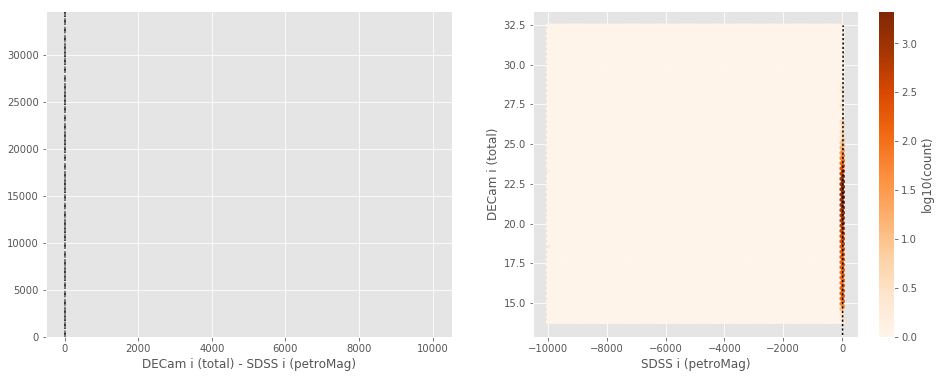

KIDS i (aperture) - SDSS i (fiberMag):
- Median: -0.28
- Median Absolute Deviation: 0.09
- 1% percentile: -0.8630049133300781
- 99% percentile: 0.4371201896667505


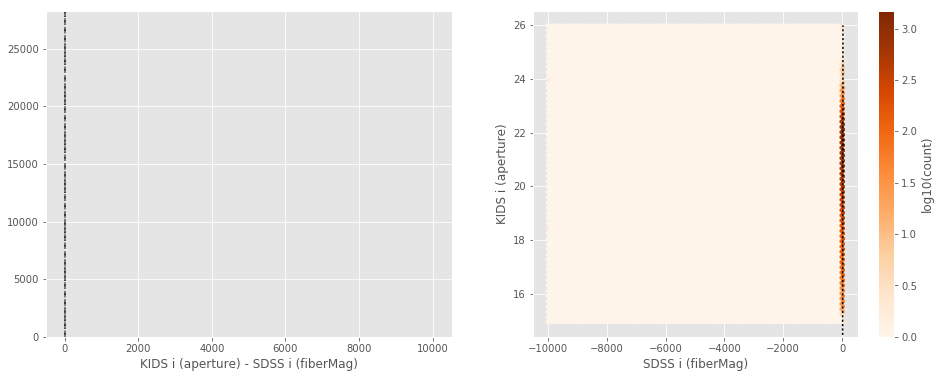

KIDS i (total) - SDSS i (petroMag):
- Median: -0.28
- Median Absolute Deviation: 0.09
- 1% percentile: -0.8630049133300781
- 99% percentile: 0.4371201896667505


In [ ]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap = sdss["fiberMag_{}".format(band[-1])]
        master_cat_mag_ap = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
    
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss["petroMag_{}".format(band[-1])]
        master_cat_mag_tot = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the UKIDSS total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In addition, UKIDSS uses a K band whereas 2MASS uses a Ks (“short”) band, [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4b.html) give a correction to convert the K band in a Ks band with the formula:

$$K_{s(2MASS)} = K_{UKIRT} + 0.003 + 0.004 * (J−K)_{UKIRT}$$

In [ ]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [ ]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_GAMA-09.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

In [ ]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_ukidss_j'][ml_twomass_idx],
                labels=("2MASS J", "UKIDSS J (total)"))

In [ ]:
ukidss_ks_like = master_catalogue['m_ukidss_k'] + 0.003 + 0.004 * (
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'])
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, ukidss_ks_like[ml_twomass_idx],
                labels=("2MASS Ks", "UKIDSS Ks-like (total)"))

In [ ]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_vista_j'][ml_twomass_idx],
                labels=("2MASS J", "VISTA J (total)"))

In [ ]:
ukidss_ks_like = master_catalogue['m_vista_k'] + 0.003 + 0.004 * (
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'])
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, ukidss_ks_like[ml_twomass_idx],
                labels=("2MASS Ks", "VISTA Ks (total)"))

## IV - Comparing aperture magnitudes to total ones.

In [ ]:
nb_ccplots(
    master_catalogue['m_megacam_r'],
    master_catalogue['m_ap_megacam_r'] - master_catalogue['m_megacam_r'],
    "r total magnitude (CFHT)", "r aperture mag - total mag (CFHT)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

In [ ]:
nb_ccplots(
    master_catalogue['m_suprime_g'] - master_catalogue['m_suprime_i'],
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'],
    "g - i (HSC)", "J - K (UKIDSS)",
    master_catalogue["stellarity"]
)

In [ ]:
nb_ccplots(
    master_catalogue['m_suprime_i'] - master_catalogue['m_vista_j'],
    master_catalogue['m_suprime_g'] - master_catalogue['m_vista_k'],
    "WFC i - IRAC1", "g - i (WFC)",
    master_catalogue["stellarity"]
)

In [ ]:
nb_ccplots(
    master_catalogue['m_megacam_u'] - master_catalogue['m_megacam_g'],
    master_catalogue['m_megacam_g'] - master_catalogue['m_megacam_r'],
    "u - g (CFHT)", "g - r (CFHT)",
    master_catalogue["stellarity"]
)

In [ ]:
nb_ccplots(
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'],
    master_catalogue['m_suprime_g'] - master_catalogue['m_ukidss_j'],
    "J - K (UKIDSS)", "g - J (HSC, UKIDSS)",
    master_catalogue["stellarity"]
)

In [ ]:
nb_ccplots(
    master_catalogue['m_suprime_i'] - master_catalogue['m_suprime_z'],
    master_catalogue['m_suprime_z'] - master_catalogue['m_ukidss_j'],
    "i - z (HSC)", "z - J (HSC, UKIDSS)",
    master_catalogue["stellarity"]
)

In [ ]:
nb_ccplots(
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'],
    master_catalogue['m_irac1'] - master_catalogue['m_irac2'],
    "IRAC3 - IRAC4", "IRAC1 - IRAC2",
    master_catalogue["stellarity"]
)